# Predictive Analytics for Customer Churns in Financial Services

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [4]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

print(f"Shape: {df.shape}")
print("\nFirst five rows:")
df.head()

Shape: (10000, 14)

First five rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Summary statistics 
print("Descriptive Statistics")
df.describe().T

Descriptive Statistics


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# Dataset Info
print("Dataset Basic Info")
df.info()

Dataset Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Check duplicates
df.duplicated().sum()

0

In [8]:
# Check mising values 
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis (EDA)

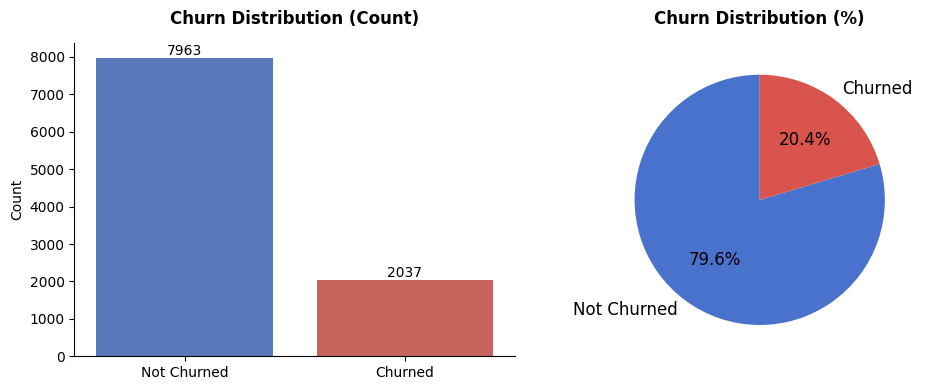

In [10]:
churn_dist = df['Exited'].value_counts()
churn_pct = df['Exited'].value_counts(normalize=True) * 100

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Custom labels and colors
labels = ['Not Churned', 'Churned']
colors_bar = ['#4972CC', '#D9544D']
colors_pie = ['#4972CC', '#D9544D']

# Count plot
sns.countplot(data=df, x='Exited', palette=colors_bar, ax=axes[0])
axes[0].set_title('Churn Distribution (Count)', fontsize=12, fontweight='bold', pad=14)
axes[0].set_xlabel('', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels, fontsize=10)
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width()/2., p.get_height(), 
                 f'{int(p.get_height())}', ha='center', va='bottom')
# Remove top and right spines
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Pie chart
axes[1].pie(churn_dist, labels=labels, autopct='%1.1f%%',
            colors=colors_pie, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Churn Distribution (%)', fontsize=12, fontweight='bold', pad=14)

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi =300)  # Save the figure
plt.show()

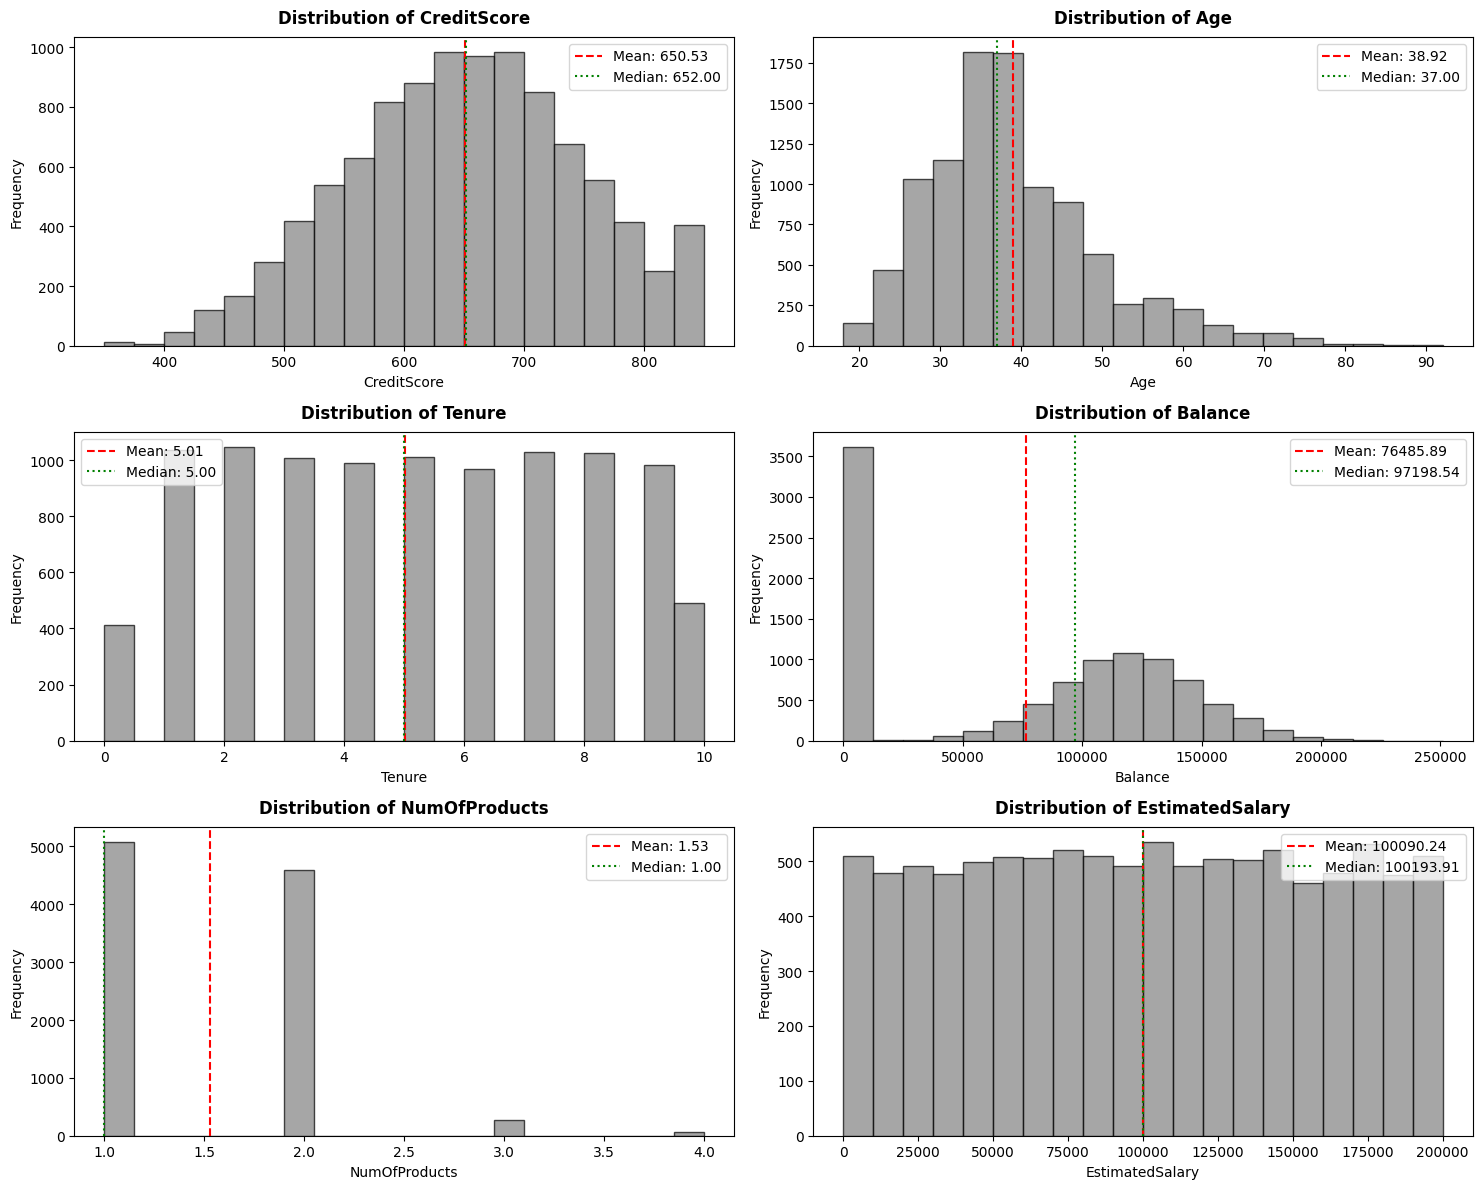

In [11]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                  'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=20, color='gray', edgecolor='black', alpha=0.7) 
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold', pad =10)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.subplots_adjust(wspace=0.8)
plt.tight_layout()
plt.savefig('numeric_distributions.png', dpi = 300)
plt.show()


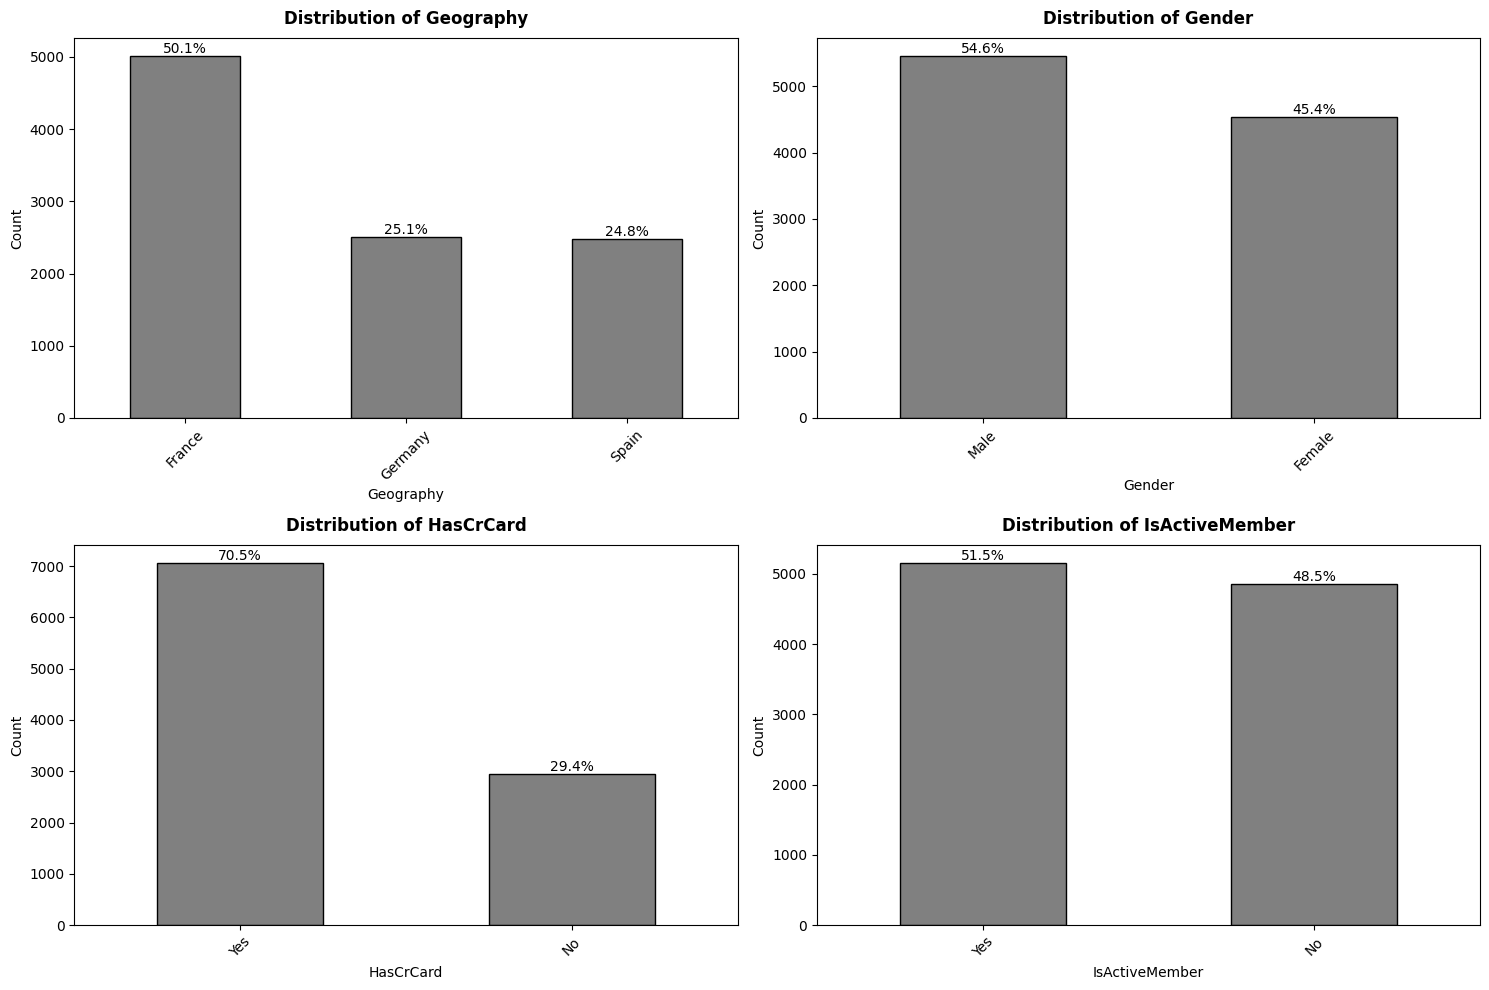

In [12]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
label_maps = {
    'HasCrCard': {0: 'No', 1: 'Yes'},
    'IsActiveMember': {0: 'No', 1: 'Yes'}
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    total = value_counts.sum()
    if col in label_maps:
        # Remap x labels for binary columns
        value_counts.index = value_counts.index.map(label_maps[col])
    bars = value_counts.plot(kind='bar', ax=axes[idx], color='gray', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold', pad = 10)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='x', visible=False) 
    for bar, count in zip(axes[idx].patches, value_counts.values):
        percent = 100 * count / total
        axes[idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                       f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)
        
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()
plt.savefig('cat_distributions.png', dpi=300)
plt.show()


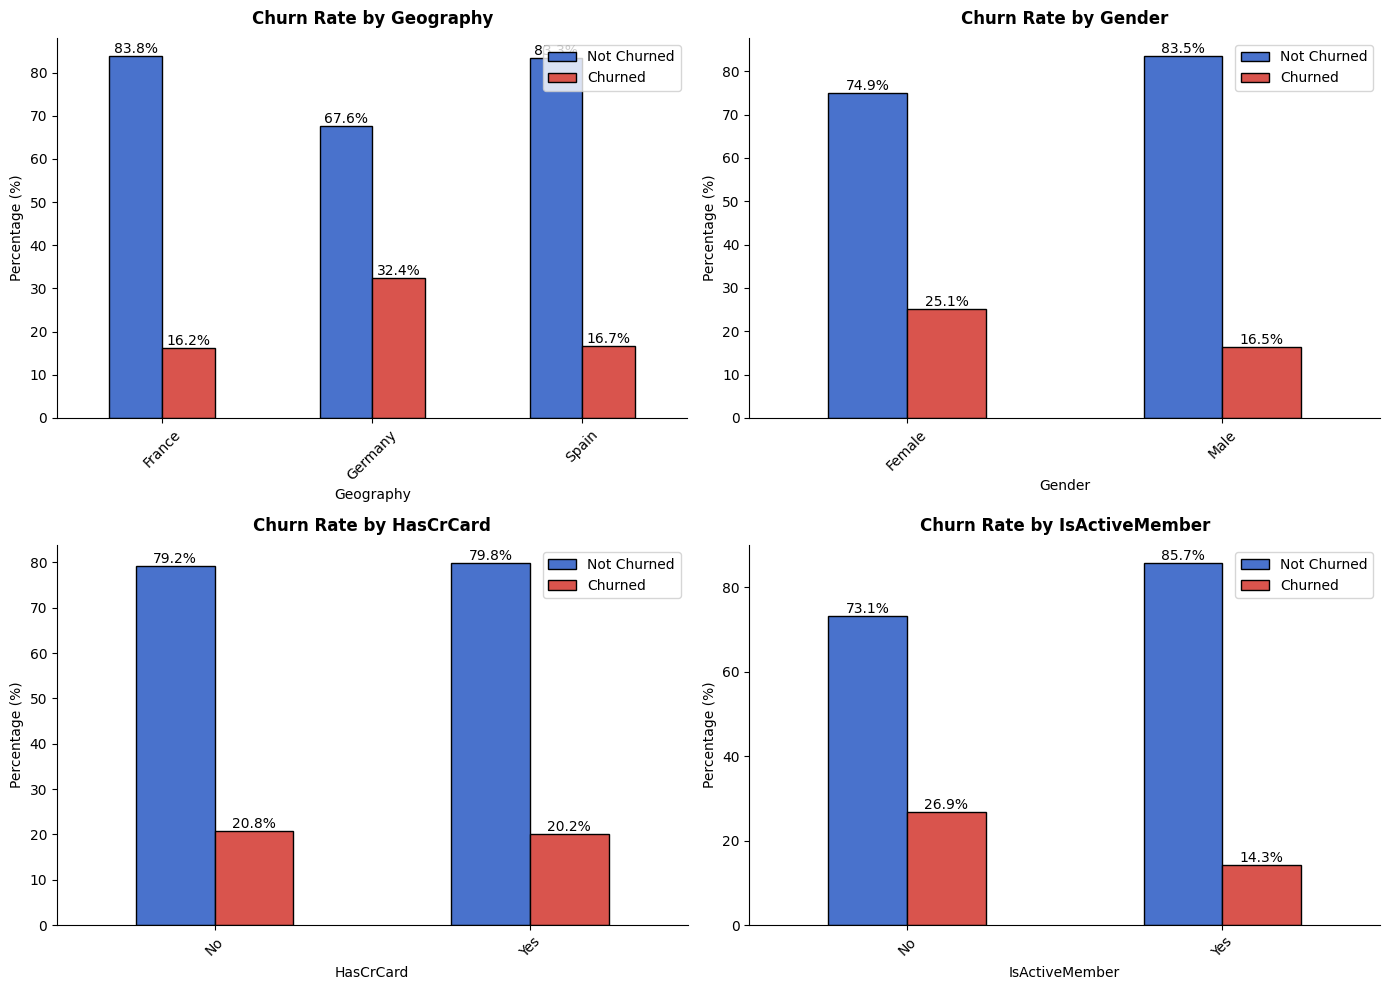

In [13]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
label_maps = {
    'HasCrCard': {0: 'No', 1: 'Yes'},
    'IsActiveMember': {0: 'No', 1: 'Yes'}
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    churn_by_cat = pd.crosstab(df[col], df['Exited'], normalize='index') * 100
    if col in label_maps:
        churn_by_cat.index = churn_by_cat.index.map(label_maps[col])
    bars = churn_by_cat.plot(kind='bar', ax=axes[idx], stacked=False, 
                            color=['#4972CC', '#D9544D'], edgecolor='black')
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold', pad=10)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(['Not Churned', 'Churned'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].grid(axis='x', visible=False) 
    # Annotate percentage on each bar
    for c in range(len(churn_by_cat.columns)):
        for b in bars.containers[c]:
            height = b.get_height()
            axes[idx].text(b.get_x() + b.get_width()/2, height,
                           f'{height:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.subplots_adjust(wspace=0.8)
plt.tight_layout()
plt.savefig('cat_churn.png', dpi=300)
plt.show()


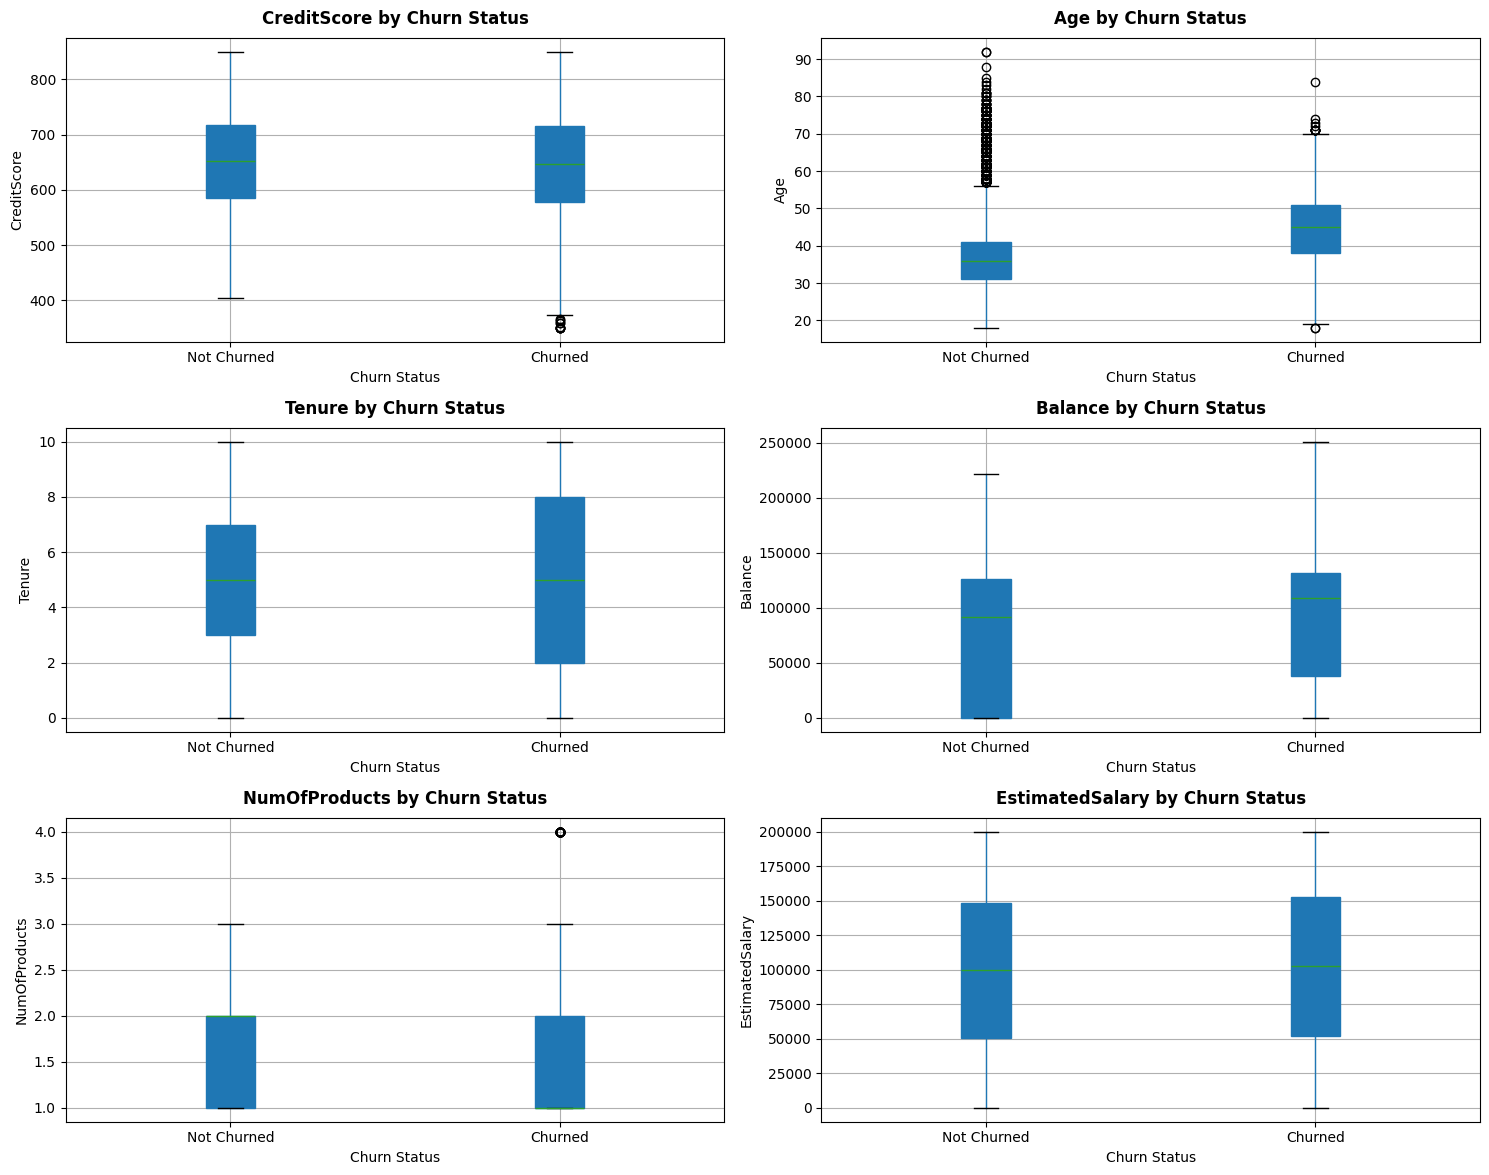

In [14]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                  'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    box = df.boxplot(column=col, by='Exited', ax=axes[idx], patch_artist=True)
    for patch, color in zip(axes[idx].artists):
        patch.set_facecolor(color)
    axes[idx].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold', pad=10)
    axes[idx].set_xlabel('Churn Status', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Not Churned', 'Churned'])

plt.suptitle('')  # Remove automatic suptitle added by pandas
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()
plt.savefig('num_churn.png', dpi=300)
plt.show()


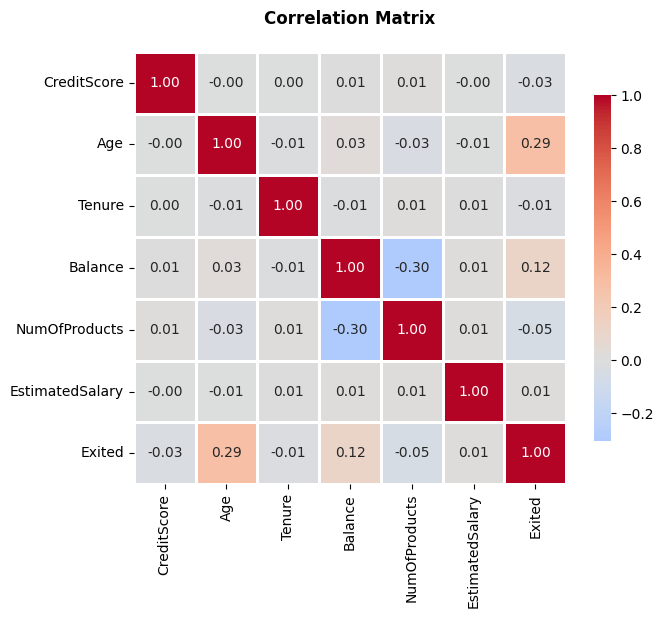


Correlation with Target Variable (Exited):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Name: Exited, dtype: float64


In [15]:
# Select only numerical columns for correlation
numerical_data = df[numerical_cols + ['Exited']]

plt.figure(figsize=(7, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('cor_matrix.png', dpi=300)
plt.show()

print("\nCorrelation with Target Variable (Exited):")
print(correlation_matrix['Exited'].sort_values(ascending=False))

In [16]:
print(f"\n1. Dataset Size: {len(df)} customers")
print(f"2. Churn Rate: {(df['Exited'].sum()/len(df)*100):.2f}%")
print(f"3. Average Age: {df['Age'].mean():.1f} years")
print(f"4. Average Tenure: {df['Tenure'].mean():.1f} years")
print(f"5. Geography Distribution: {dict(df['Geography'].value_counts())}")
print(f"6. Gender Distribution: {dict(df['Gender'].value_counts())}")
print(f"7. Customers with Credit Card: {(df['HasCrCard'].sum()/len(df)*100):.2f}%")
print(f"8. Active Members: {(df['IsActiveMember'].sum()/len(df)*100):.2f}%")


1. Dataset Size: 10000 customers
2. Churn Rate: 20.37%
3. Average Age: 38.9 years
4. Average Tenure: 5.0 years
5. Geography Distribution: {'France': 5014, 'Germany': 2509, 'Spain': 2477}
6. Gender Distribution: {'Male': 5457, 'Female': 4543}
7. Customers with Credit Card: 70.55%
8. Active Members: 51.51%


## Statistical Hypothesis Tests

In [18]:
from scipy.stats import chi2_contingency, mannwhitneyu
import scipy.stats as stats

### CHI-SQUARE TESTS: Categorical Features vs Churn


H0: Variables are independent
H1: Variables are dependent (associated)
Significance level: α = 0.05

Geography:
  Chi-square: 301.2553, P-value: 0.0000, DoF: 2
  Cramér's V: 0.1736 (Moderate association)
  Result: Reject H0 - Variables are DEPENDENT

  Contingency Table:
Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

Gender:
  Chi-square: 112.9186, P-value: 0.0000, DoF: 1
  Cramér's V: 0.1063 (Moderate association)
  Result: Reject H0 - Variables are DEPENDENT

  Contingency Table:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

HasCrCard:
  Chi-square: 0.4713, P-value: 0.4924, DoF: 1
  Cramér's V: 0.0069 (Weak association)
  Result: Fail to reject H0 - Variables are independent

  Contingency Table:
Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424

IsActiveMember:
  Chi-square: 242.9853, P-value: 0.0000, DoF: 1
  Cramér's V: 0.1559 (Moderate association)
  Re

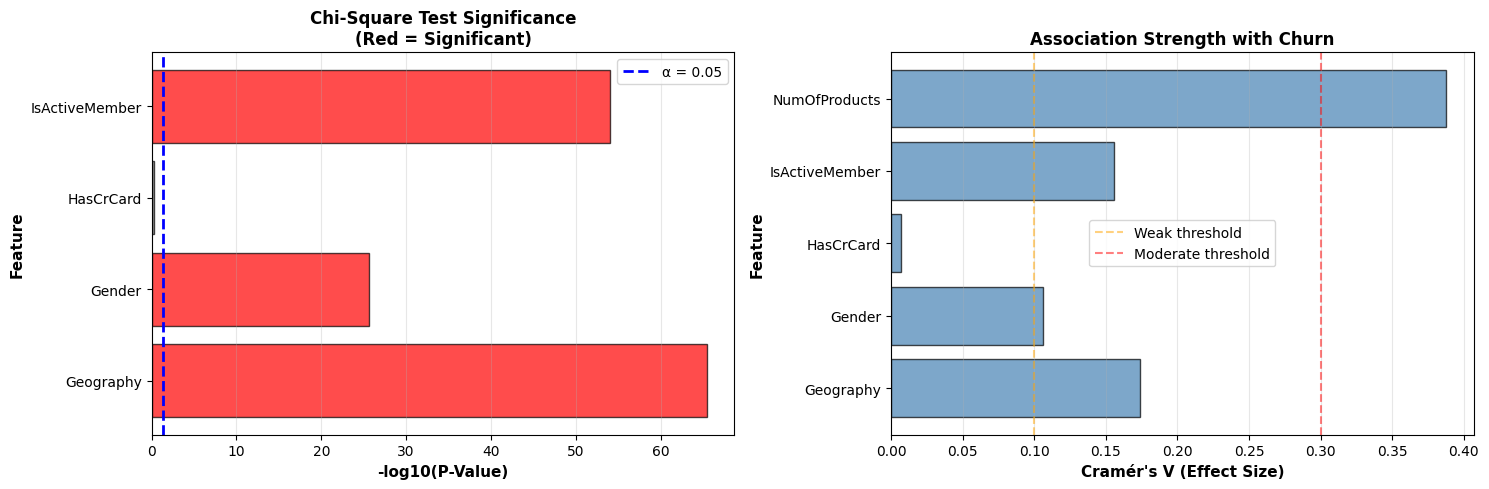

In [20]:
print("\nH0: Variables are independent")
print("H1: Variables are dependent (associated)")
print("Significance level: α = 0.05\n")

categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

chi2_results = []

for col in categorical_cols:
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['Exited'])
    
    # Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V (effect size for chi-square)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))
    
    chi2_results.append({
        'Feature': col,
        'Chi-Square': chi2_stat,
        'P-Value': p_value,
        'DoF': dof,
        "Cramér's V": cramers_v,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })
    
    print(f"{col}:")
    print(f"  Chi-square: {chi2_stat:.4f}, P-value: {p_value:.4f}, DoF: {dof}")
    print(f"  Cramér's V: {cramers_v:.4f} ({'Weak' if cramers_v < 0.1 else 'Moderate' if cramers_v < 0.3 else 'Strong'} association)")
    print(f"  Result: {'Reject H0 - Variables are DEPENDENT' if p_value < 0.05 else 'Fail to reject H0 - Variables are independent'}")
    print(f"\n  Contingency Table:")
    print(contingency_table)
    print()

chi2_df = pd.DataFrame(chi2_results)
print("\nSummary Table:")
print(chi2_df.to_string(index=False))

# Visualize Chi-square results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# P-values
significant = chi2_df['P-Value'] < 0.05
colors = ['red' if sig else 'gray' for sig in significant]
axes[0].barh(chi2_df['Feature'], -np.log10(chi2_df['P-Value']), color=colors, alpha=0.7, edgecolor='black')
axes[0].axvline(x=-np.log10(0.05), color='blue', linestyle='--', linewidth=2, label='α = 0.05')
axes[0].set_xlabel('-log10(P-Value)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Feature', fontsize=11, fontweight='bold')
axes[0].set_title('Chi-Square Test Significance\n(Red = Significant)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Cramér's V (effect sizes)
axes[1].barh(chi2_df['Feature'], chi2_df["Cramér's V"], color='steelblue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel("Cramér's V (Effect Size)", fontsize=11, fontweight='bold')
axes[1].set_ylabel('Feature', fontsize=11, fontweight='bold')
axes[1].set_title('Association Strength with Churn', fontsize=12, fontweight='bold')
axes[1].axvline(x=0.1, color='orange', linestyle='--', alpha=0.5, label='Weak threshold')
axes[1].axvline(x=0.3, color='red', linestyle='--', alpha=0.5, label='Moderate threshold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('chi_sq_test.png', dpi=300)
plt.show()

### MANN-WHITNEY U TEST: Numerical Features vs Churn (NON-PARAMETRIC)


H0: Distributions are equal between churned and non-churned
H1: Distributions differ between churned and non-churned
Significance level: α = 0.05

CreditScore:
  Churned Median: 646.00, Not Churned Median: 653.00
  U-statistic: 7839548.0000, P-value: 0.0199
  Rank-biserial r: 0.0334 (Small effect)
  Result: Reject H0 - Significant difference

Age:
  Churned Median: 45.00, Not Churned Median: 36.00
  U-statistic: 11874649.5000, P-value: 0.0000
  Rank-biserial r: -0.4641 (Medium effect)
  Result: Reject H0 - Significant difference

Tenure:
  Churned Median: 5.00, Not Churned Median: 5.00
  U-statistic: 7948575.5000, P-value: 0.1622
  Rank-biserial r: 0.0199 (Small effect)
  Result: Fail to reject H0 - No significant difference

Balance:
  Churned Median: 109349.29, Not Churned Median: 92072.68
  U-statistic: 9371186.5000, P-value: 0.0000
  Rank-biserial r: -0.1555 (Small effect)
  Result: Reject H0 - Significant difference

NumOfProducts:
  Churned Median: 1.00, Not Churned Median: 2.00

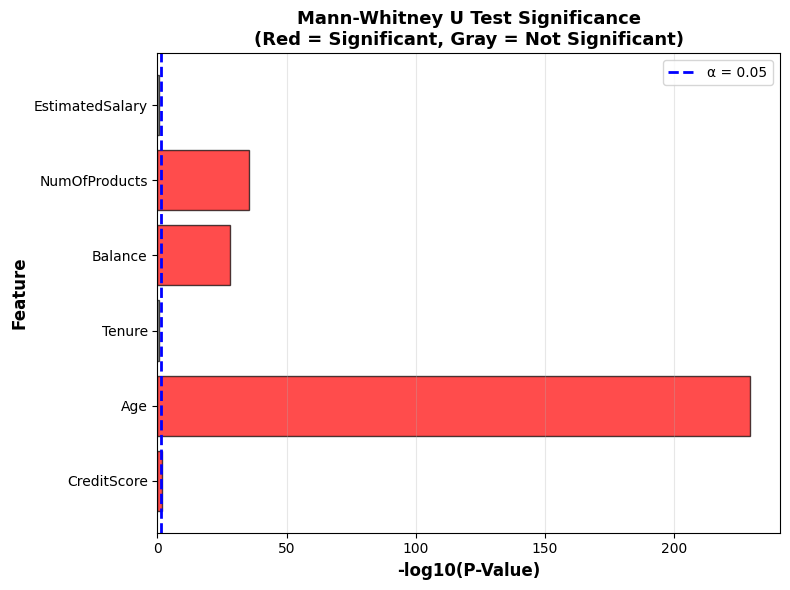

In [22]:
print("\nH0: Distributions are equal between churned and non-churned")
print("H1: Distributions differ between churned and non-churned")
print("Significance level: α = 0.05\n")

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                  'NumOfProducts', 'EstimatedSalary']

mannwhitney_results = []

for col in numerical_cols:
    churned = df[df['Exited'] == 1][col].dropna()
    not_churned = df[df['Exited'] == 0][col].dropna()
    
    # Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(churned, not_churned, alternative='two-sided')
    
    # Rank-biserial correlation (effect size for Mann-Whitney)
    n1, n2 = len(churned), len(not_churned)
    rank_biserial = 1 - (2*u_stat) / (n1 * n2)
    
    mannwhitney_results.append({
        'Feature': col,
        'Churned Median': churned.median(),
        'Not Churned Median': not_churned.median(),
        'U-Statistic': u_stat,
        'P-Value': p_value,
        'Rank-Biserial r': rank_biserial,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })
    
    print(f"{col}:")
    print(f"  Churned Median: {churned.median():.2f}, Not Churned Median: {not_churned.median():.2f}")
    print(f"  U-statistic: {u_stat:.4f}, P-value: {p_value:.4f}")
    print(f"  Rank-biserial r: {rank_biserial:.4f} ({'Small' if abs(rank_biserial) < 0.3 else 'Medium' if abs(rank_biserial) < 0.5 else 'Large'} effect)")
    print(f"  Result: {'Reject H0 - Significant difference' if p_value < 0.05 else 'Fail to reject H0 - No significant difference'}\n")

mannwhitney_df = pd.DataFrame(mannwhitney_results)
print("Summary Table:")
print(mannwhitney_df.to_string(index=False))

# Visualize Mann-Whitney results
plt.figure(figsize=(8, 6))
significant = mannwhitney_df['P-Value'] < 0.05
colors = ['red' if sig else 'gray' for sig in significant]
plt.barh(mannwhitney_df['Feature'], -np.log10(mannwhitney_df['P-Value']), color=colors, alpha=0.7, edgecolor='black')
plt.axvline(x=-np.log10(0.05), color='blue', linestyle='--', linewidth=2, label='α = 0.05')
plt.xlabel('-log10(P-Value)', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Mann-Whitney U Test Significance\n(Red = Significant, Gray = Not Significant)', 
         fontsize=13, fontweight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mann_u_test.png', dpi=300)
plt.show()

### Correlation Significance Tests


H0: Correlation = 0 (no linear relationship)
H1: Correlation ≠ 0 (linear relationship exists)
Significance level: α = 0.05

CreditScore:
  Correlation: -0.0271, P-value: 0.0067
  Strength: Weak, Result: Significant

Age:
  Correlation: 0.2853, P-value: 0.0000
  Strength: Weak, Result: Significant

Tenure:
  Correlation: -0.0140, P-value: 0.1615
  Strength: Weak, Result: Not significant

Balance:
  Correlation: 0.1185, P-value: 0.0000
  Strength: Weak, Result: Significant

NumOfProducts:
  Correlation: -0.0478, P-value: 0.0000
  Strength: Weak, Result: Significant

EstimatedSalary:
  Correlation: 0.0121, P-value: 0.2264
  Strength: Weak, Result: Not significant

Summary Table:
        Feature  Correlation       P-Value Strength Significant
    CreditScore    -0.027094  6.738214e-03     Weak         Yes
            Age     0.285323 1.239931e-186     Weak         Yes
         Tenure    -0.014001  1.615268e-01     Weak          No
        Balance     0.118533  1.275563e-32     Weak       

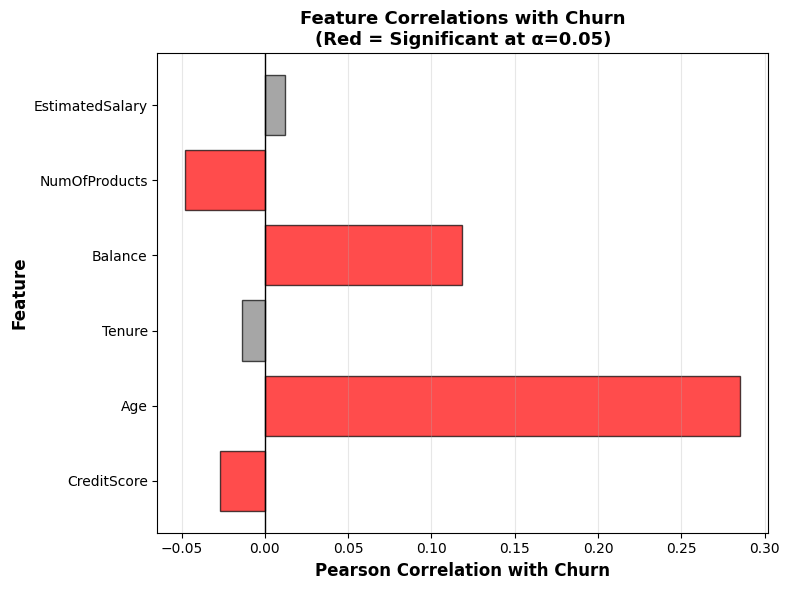

In [24]:
print("\nH0: Correlation = 0 (no linear relationship)")
print("H1: Correlation ≠ 0 (linear relationship exists)")
print("Significance level: α = 0.05\n")

correlation_results = []

for col in numerical_cols:
    # Pearson correlation with Exited
    corr_coef, p_value = stats.pearsonr(df[col], df['Exited'])
    
    # Interpretation
    if abs(corr_coef) < 0.3:
        strength = "Weak"
    elif abs(corr_coef) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    correlation_results.append({
        'Feature': col,
        'Correlation': corr_coef,
        'P-Value': p_value,
        'Strength': strength,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })
    
    print(f"{col}:")
    print(f"  Correlation: {corr_coef:.4f}, P-value: {p_value:.4f}")
    print(f"  Strength: {strength}, Result: {'Significant' if p_value < 0.05 else 'Not significant'}\n")

correlation_df = pd.DataFrame(correlation_results)
print("Summary Table:")
print(correlation_df.to_string(index=False))

# Visualize correlations with significance
plt.figure(figsize=(8, 6))
significant = correlation_df['P-Value'] < 0.05
colors = ['red' if sig else 'gray' for sig in significant]
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], 
        color=colors, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Pearson Correlation with Churn', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Feature Correlations with Churn\n(Red = Significant at α=0.05)', 
         fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('cor_test.png', dpi=300)
plt.show()

### Comprehensive Summary

In [26]:
summary_data = []

# Numerical features
for col in numerical_cols:
    mw_sig = mannwhitney_df[mannwhitney_df['Feature'] == col]['Significant'].values[0]
    corr_sig = correlation_df[correlation_df['Feature'] == col]['Significant'].values[0]
    corr_val = correlation_df[correlation_df['Feature'] == col]['Correlation'].values[0]
    
    summary_data.append({
        'Feature': col,
        'Type': 'Numerical',
        'Mann-Whitney': mw_sig,
        'Correlation': f"{corr_val:.3f} ({corr_sig})",
        'Overall': 'Significant' if mw_sig == 'Yes' or corr_sig == 'Yes' else 'Not Significant'
    })

# Categorical features
for col in categorical_cols:
    chi2_sig = chi2_df[chi2_df['Feature'] == col]['Significant'].values[0]
    cramers = chi2_df[chi2_df['Feature'] == col]["Cramér's V"].values[0]
    
    summary_data.append({
        'Feature': col,
        'Type': 'Categorical',
        'Chi-Square': chi2_sig,
        "Cramér's V": f"{cramers:.3f}",
        'Overall': 'Significant' if chi2_sig == 'Yes' else 'Not Significant'
    })

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))


         Feature        Type Mann-Whitney  Correlation         Overall Chi-Square Cramér's V
    CreditScore   Numerical          Yes -0.027 (Yes)     Significant        NaN        NaN
            Age   Numerical          Yes  0.285 (Yes)     Significant        NaN        NaN
         Tenure   Numerical           No  -0.014 (No) Not Significant        NaN        NaN
        Balance   Numerical          Yes  0.119 (Yes)     Significant        NaN        NaN
  NumOfProducts   Numerical          Yes -0.048 (Yes)     Significant        NaN        NaN
EstimatedSalary   Numerical           No   0.012 (No) Not Significant        NaN        NaN
      Geography Categorical          NaN          NaN     Significant        Yes      0.174
         Gender Categorical          NaN          NaN     Significant        Yes      0.106
      HasCrCard Categorical          NaN          NaN Not Significant         No      0.007
 IsActiveMember Categorical          NaN          NaN     Significant        Y

## Data Preprocessing

In [28]:
# Create a copy for preprocessing
df_processed = df.copy()

### Remove Irrelevant Features

In [30]:
# RowNumber, CustomerId, and Surname are not useful for prediction
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_processed = df_processed.drop(columns=columns_to_drop)

In [31]:
df_processed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encode Categorical Variables

In [33]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding for Gender
le_gender = LabelEncoder()
df_processed['Gender'] = le_gender.fit_transform(df_processed['Gender'])
print(f"Gender encoded: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

Gender encoded: {'Female': 0, 'Male': 1}


In [34]:
# One-hot encoding for Geography (with drop_first to avoid multicollinearity)
df_processed = pd.get_dummies(df_processed, columns=['Geography'], prefix='Geography', drop_first=True)

In [35]:
print(f"Processed dataset shape: {df_processed.shape}")
print(f"\nColumns after encoding: {list(df_processed.columns)}")

Processed dataset shape: (10000, 12)

Columns after encoding: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain']


In [36]:
df_processed.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


## Feature Engineering

In [38]:
# 1. Balance to Salary Ratio
df_processed['BalanceToSalary_Ratio'] = df_processed['Balance'] / (df_processed['EstimatedSalary'] + 1)

In [39]:
# 2. Age Groups (Categorized age (0:<30, 1:30-40, 2:40-50, 3:>50)
df_processed['Age_Group'] = pd.cut(df_processed['Age'], 
                                    bins=[0, 30, 40, 50, 100], 
                                    labels=[0, 1, 2, 3])
df_processed['Age_Group'] = df_processed['Age_Group'].astype(int)

In [40]:
# 3. Is Senior (Age > 50)
df_processed['Is_Senior'] = (df_processed['Age'] > 50).astype(int)

In [41]:
# 4. Has Zero Balance (Binary flag for zero balance)
df_processed['Has_Zero_Balance'] = (df_processed['Balance'] == 0).astype(int)

In [42]:
# 5. Credit Score Categories
df_processed['CreditScore_Category'] = pd.cut(df_processed['CreditScore'], 
                                                bins=[0, 600, 700, 850], 
                                                labels=[0, 1, 2])
df_processed['CreditScore_Category'] = df_processed['CreditScore_Category'].astype(int)

In [43]:
# Show correlation of new features with target
new_features = ['BalanceToSalary_Ratio', 'Age_Group', 
                'Is_Senior', 'Has_Zero_Balance', 
                'CreditScore_Category']
print("\nCorrelation of new features with Churn:")
for feat in new_features:
    corr = df_processed[[feat, 'Exited']].corr().iloc[0, 1]
    print(f"  {feat}: {corr:.4f}")


Correlation of new features with Churn:
  BalanceToSalary_Ratio: 0.0260
  Age_Group: 0.3178
  Is_Senior: 0.2290
  Has_Zero_Balance: -0.1224
  CreditScore_Category: -0.0177


In [44]:
df_processed.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,BalanceToSalary_Ratio,Age_Group,Is_Senior,Has_Zero_Balance,CreditScore_Category
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False,0.000000,2,0,1,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True,0.744670,2,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False,1.401362,2,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False,0.000000,1,0,1,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True,1.587035,2,0,0,2


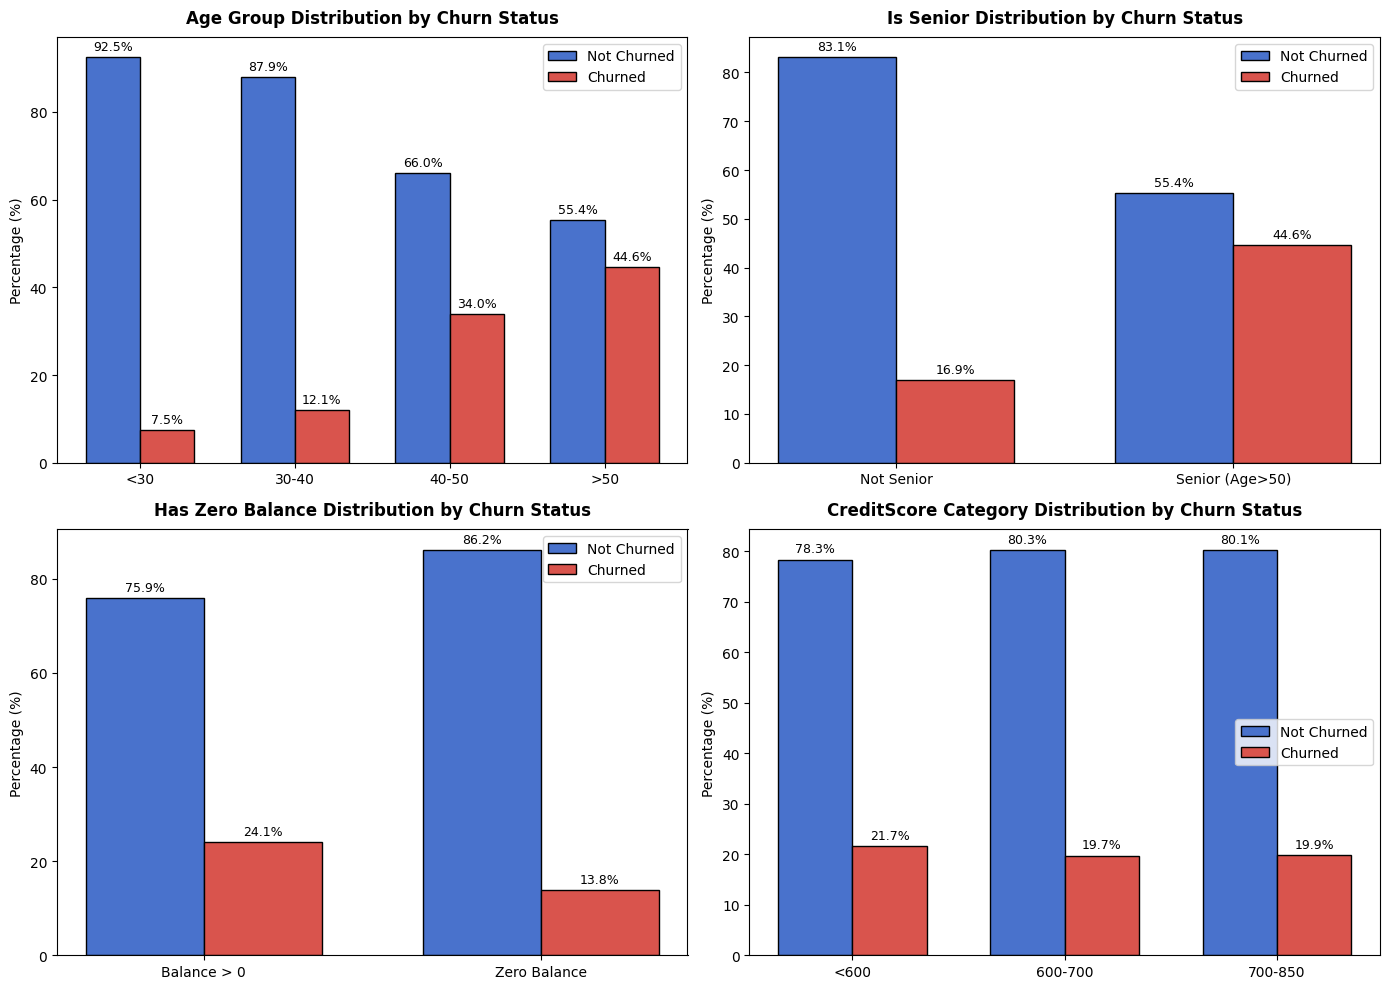

In [45]:
feature_xlabels = {
    'Age_Group': ['<30', '30-40', '40-50', '>50'],
    'Is_Senior': ['Not Senior', 'Senior (Age>50)'],
    'Has_Zero_Balance': ['Balance > 0', 'Zero Balance'],
    'CreditScore_Category': ['<600', '600-700', '700-850']
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
features_to_plot = ['Age_Group', 'Is_Senior', 'Has_Zero_Balance', 'CreditScore_Category']

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    ct = pd.crosstab(df_processed[feature], df_processed['Exited'], normalize='index') * 100
    ct = ct[[0, 1]]
    bar_width = 0.35
    x = np.arange(len(ct.index))
    bars1 = ax.bar(x - bar_width/2, ct[0], bar_width, label='Not Churned', color='#4972CC', edgecolor='black')
    bars2 = ax.bar(x + bar_width/2, ct[1], bar_width, label='Churned', color='#D9544D', edgecolor='black')
    ax.set_xticks(x)
    ax.set_xticklabels(feature_xlabels[feature], rotation=0)
    ax.set_ylabel('Percentage (%)')
    ax.set_title(f'{feature.replace("_", " ")} Distribution by Churn Status', fontweight='bold', pad=10)
    ax.legend()
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('new_feat_charts.png', dpi=300)
plt.show()

## Train-Test Split and Class-Imbalance Handling

In [47]:
# Import required libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [48]:
# Separate Features and Target
X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (10000, 16)
Target shape: (10000,)


In [49]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, stratify=y
)

print(f"Train set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print("\nClass distribution before SMOTE:")
print(f"Train - Not Churned: {sum(y_train==0)}, Churned: {sum(y_train==1)}")
print(f"Test - Not Churned: {sum(y_test==0)}, Churned: {sum(y_test==1)}")

Train set size: 8000 (80.0%)
Test set size: 2000 (20.0%)

Class distribution before SMOTE:
Train - Not Churned: 6370, Churned: 1630
Test - Not Churned: 1593, Churned: 407


### Feature Scaling

In [51]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Class Imbalnce with SMOTE

In [53]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=10, k_neighbors=min(3, sum(y_train==1)-1))
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"Class distribution after SMOTE:")
print(f"\nTrain - Not Churned: {sum(y_train_balanced==0)}, Churned: {sum(y_train_balanced==1)}")
print(f"Class balance achieved: {sum(y_train_balanced==1)/len(y_train_balanced)*100:.1f}% churned")

Class distribution after SMOTE:

Train - Not Churned: 6370, Churned: 6370
Class balance achieved: 50.0% churned


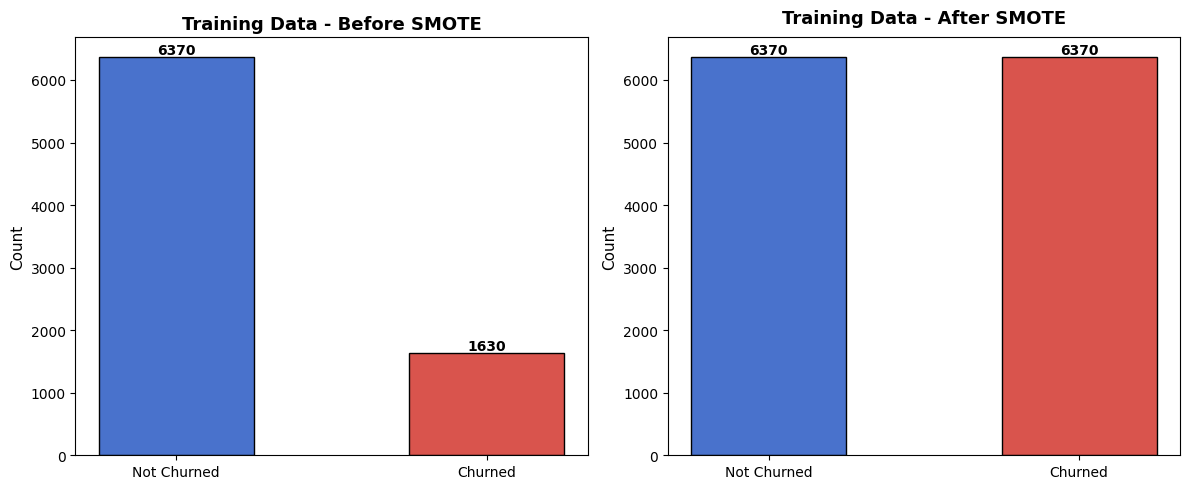

In [54]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].bar(['Not Churned', 'Churned'], [sum(y_train==0), sum(y_train==1)], 
           color=['#4972CC', '#D9544D'], edgecolor='black', width = 0.5)
axes[0].set_title('Training Data - Before SMOTE', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)
for i, v in enumerate([sum(y_train==0), sum(y_train==1)]):
    axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# After SMOTE
axes[1].bar(['Not Churned', 'Churned'], 
           [sum(y_train_balanced==0), sum(y_train_balanced==1)], 
           color=['#4972CC', '#D9544D'], edgecolor='black', width = 0.5)
axes[1].set_title('Training Data - After SMOTE', fontsize=13, fontweight='bold', pad=10)
axes[1].set_ylabel('Count', fontsize=11)
for i, v in enumerate([sum(y_train_balanced==0), sum(y_train_balanced==1)]):
    axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('smote_comparison.png', dpi=300)
plt.show()

## Machine Learning Model Implementation

In [56]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)

In [57]:
# Instatitate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

In [58]:
# Train and Evaluate models
results = {}

for name, model in models.items():
    print(f"\n{name}")
    print(f"{'='*20}")
    
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Print results
    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")


Logistic Regression

Performance Metrics:
  Accuracy:  0.7015
  Precision: 0.3750
  Recall:    0.7002
  F1-Score:  0.4884
  ROC-AUC:   0.7795

Decision Tree

Performance Metrics:
  Accuracy:  0.7705
  Precision: 0.4444
  Recall:    0.5111
  F1-Score:  0.4754
  ROC-AUC:   0.6739

Random Forest

Performance Metrics:
  Accuracy:  0.8460
  Precision: 0.6435
  Recall:    0.5455
  F1-Score:  0.5904
  ROC-AUC:   0.8579

Gradient Boosting

Performance Metrics:
  Accuracy:  0.8475
  Precision: 0.6220
  Recall:    0.6388
  F1-Score:  0.6303
  ROC-AUC:   0.8616

Support Vector Machine

Performance Metrics:
  Accuracy:  0.7835
  Precision: 0.4792
  Recall:    0.7371
  F1-Score:  0.5808
  ROC-AUC:   0.8480



                  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
     Gradient Boosting    0.8475   0.622010 0.638821  0.630303 0.861583
         Random Forest    0.8460   0.643478 0.545455  0.590426 0.857947
Support Vector Machine    0.7835   0.479233 0.737101  0.580833 0.848048
   Logistic Regression    0.7015   0.375000 0.700246  0.488432 0.779481
         Decision Tree    0.7705   0.444444 0.511057  0.475429 0.673921


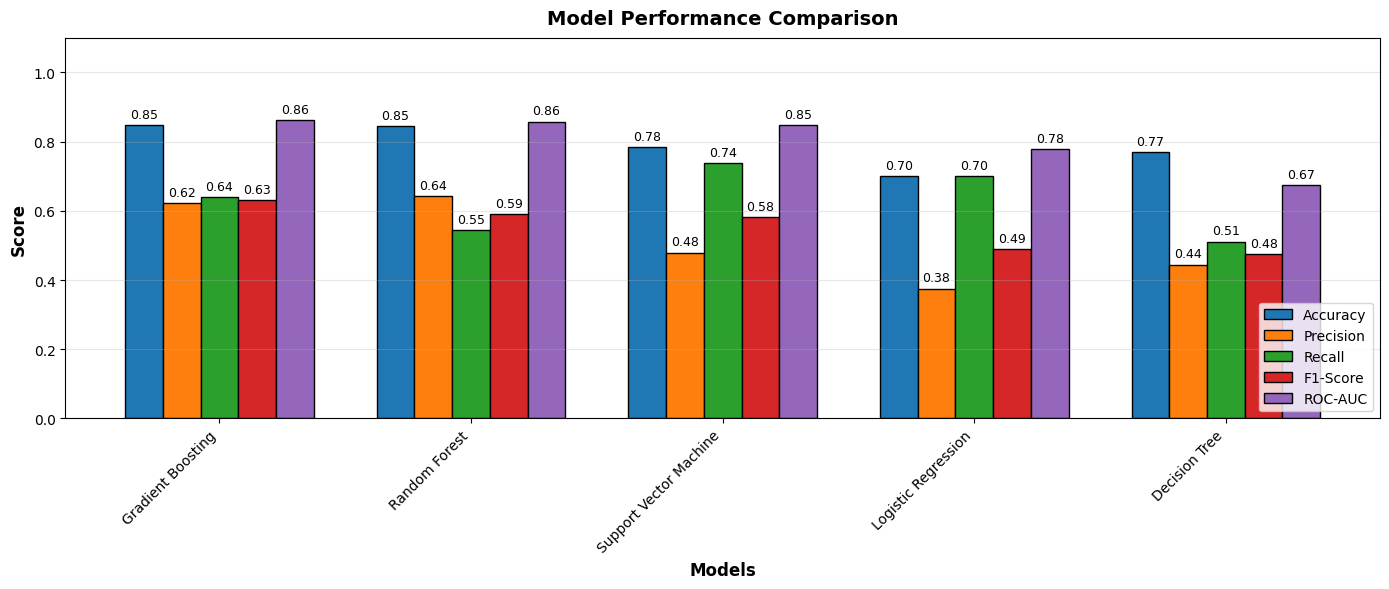

In [59]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

comparison_df = comparison_df.sort_values('ROC-AUC', ascending=False)
print("\n", comparison_df.to_string(index=False))

# Visualize comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(comparison_df))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 6))

for i, metric in enumerate(metrics):
    bars = ax.bar(x + i*width, comparison_df[metric], width, label=metric, edgecolor='black')
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Slightly above the bar
            textcoords="offset points",
            ha='center', va='bottom', fontsize=9
        )

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold', pad=10)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right')
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

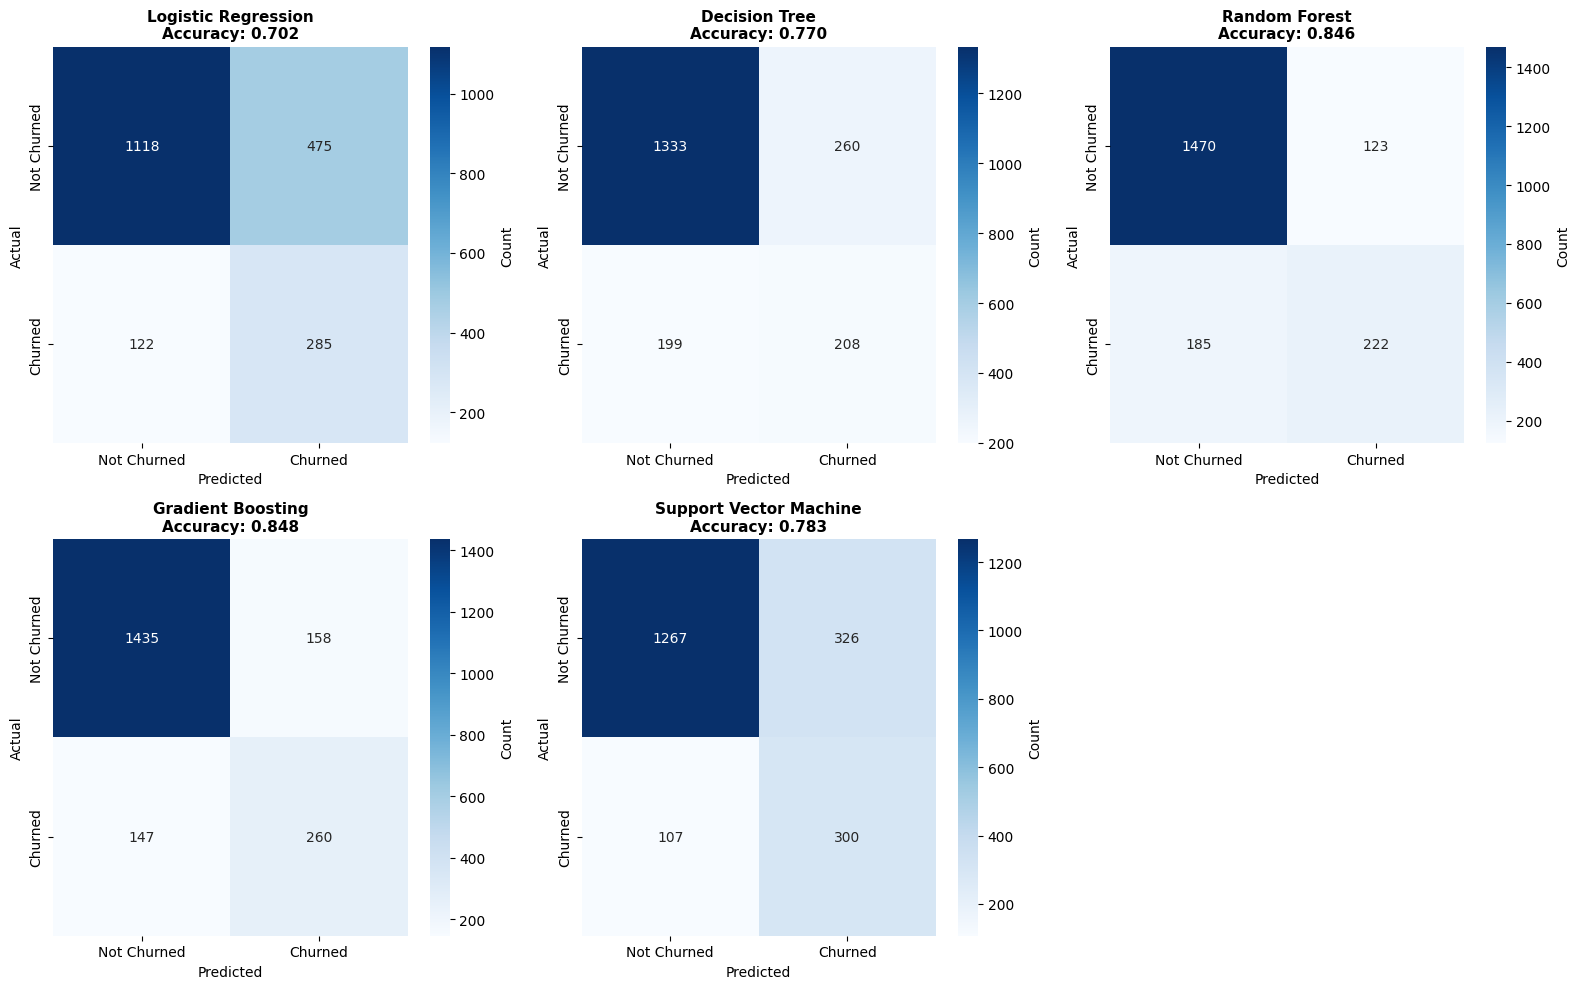

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
               cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}', 
                       fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=10)
    axes[idx].set_xlabel('Predicted', fontsize=10)
    axes[idx].set_xticklabels(['Not Churned', 'Churned'])
    axes[idx].set_yticklabels(['Not Churned', 'Churned'])

# Remove extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.savefig('conf_matrix.png', dpi=300)
plt.show()

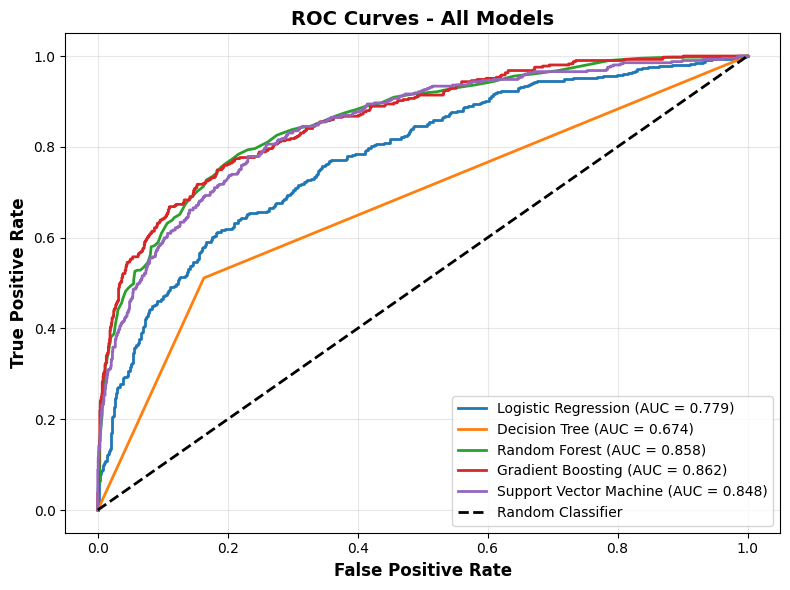

In [61]:
plt.figure(figsize=(8, 6))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300)
plt.show()

## Hyperparameter Tuning and Cross-Validation

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [64]:
# Define Hyperparameter Grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5]
    }
}

In [65]:
# Perform Grid Search with Cross-Validation
tuned_models = {}
cv_results = {}

for name in ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']:
    print(f"{name} Tuning")
    print(f"{'='*25}")
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit grid search
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    # Store best model
    tuned_models[name] = grid_search.best_estimator_
    
    # Print results
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best CV Score (ROC-AUC): {grid_search.best_score_:.4f}")
    
    # Test set performance
    y_pred = grid_search.predict(X_test_scaled)
    y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
    
    test_accuracy = accuracy_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred_proba)
    test_f1 = f1_score(y_test, y_pred)
    
    print(f"\nTest Set Performance:")
    print(f"  Accuracy:  {test_accuracy:.4f}")
    print(f"  ROC-AUC:   {test_roc_auc:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}\n")
    
    # Store CV results
    cv_results[name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'test_accuracy': test_accuracy,
        'test_roc_auc': test_roc_auc,
        'test_f1': test_f1
    }


Logistic Regression Tuning
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score (ROC-AUC): 0.7847

Test Set Performance:
  Accuracy:  0.7010
  ROC-AUC:   0.7795
  F1-Score:  0.4880

Decision Tree Tuning
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Score (ROC-AUC): 0.9074

Test Set Performance:
  Accuracy:  0.7840
  ROC-AUC:   0.8063
  F1-Score:  0.5509

Random Forest Tuning
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score (ROC-AUC): 0.9713

Test Set Performance:
  Accuracy:  0.8490
  ROC-AUC:   0.8618
  F1-Score:  0.5984

Gradient Boosting Tuning
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best CV Score (ROC-AUC): 0.9614

Test Set Performance:
  Accuracy:  0.8565
  ROC-AUC:   0.8581
  F1-Score:  0.6137



In [66]:
# Cross-validation Scores
cv_scores_summary = []

for name, model in tuned_models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, 
                                cv=5, scoring='roc_auc')
    
    cv_scores_summary.append({
        'Model': name,
        'Mean CV Score': cv_scores.mean(),
        'Std CV Score': cv_scores.std(),
        'Min CV Score': cv_scores.min(),
        'Max CV Score': cv_scores.max()
    })
    
    print(f"\n{name}:")
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

cv_summary_df = pd.DataFrame(cv_scores_summary)
print("\n", cv_summary_df.to_string(index=False))


Logistic Regression:
  CV Scores: [0.77200821 0.77566916 0.79796325 0.77957841 0.79805505]
  Mean: 0.7847 (+/- 0.0223)

Decision Tree:
  CV Scores: [0.81772542 0.91112985 0.93473041 0.93984447 0.93369195]
  Mean: 0.9074 (+/- 0.0919)

Random Forest:
  CV Scores: [0.92420564 0.96828584 0.98808127 0.98758345 0.98850239]
  Mean: 0.9713 (+/- 0.0496)

Gradient Boosting:
  CV Scores: [0.86410495 0.95937652 0.99514749 0.99436564 0.99422393]
  Mean: 0.9614 (+/- 0.1011)

               Model  Mean CV Score  Std CV Score  Min CV Score  Max CV Score
Logistic Regression       0.784655      0.011164      0.772008      0.798055
      Decision Tree       0.907424      0.045927      0.817725      0.939844
      Random Forest       0.971332      0.024778      0.924206      0.988502
  Gradient Boosting       0.961444      0.050544      0.864105      0.995147



               Model  Before Tuning  After Tuning  Improvement (%)
Logistic Regression       0.779481      0.779542         0.007915
      Decision Tree       0.673921      0.806285        19.640795
      Random Forest       0.857947      0.861839         0.453663
  Gradient Boosting       0.861583      0.858061        -0.408694


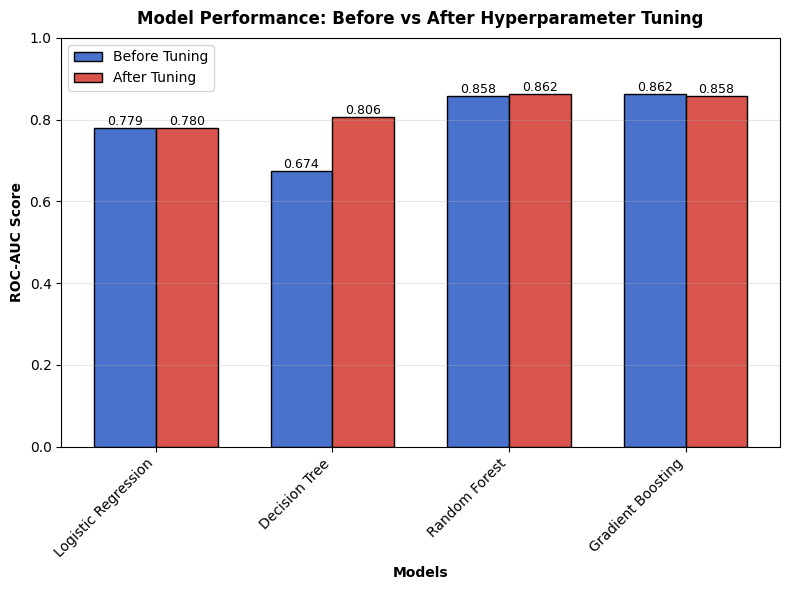

In [67]:
# Compare Before and After Tuning
improvement_data = []

for name in tuned_models.keys():
    before_roc = results[name]['roc_auc']
    after_roc = cv_results[name]['test_roc_auc']
    improvement = ((after_roc - before_roc) / before_roc) * 100
    
    improvement_data.append({
        'Model': name,
        'Before Tuning': before_roc,
        'After Tuning': after_roc,
        'Improvement (%)': improvement
    })

improvement_df = pd.DataFrame(improvement_data)
print("\n", improvement_df.to_string(index=False))

# Visualize improvement
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(improvement_df))
width = 0.35

bars1 = ax.bar(x - width/2, improvement_df['Before Tuning'], width, 
              label='Before Tuning', color='#4972CC', edgecolor='black')
bars2 = ax.bar(x + width/2, improvement_df['After Tuning'], width, 
              label='After Tuning', color='#D9544D', edgecolor='black')

ax.set_xlabel('Models', fontsize=10, fontweight='bold')
ax.set_ylabel('ROC-AUC Score', fontsize=10, fontweight='bold')
ax.set_title('Model Performance: Before vs After Hyperparameter Tuning', 
            fontsize=12, fontweight='bold', pad=10)
ax.set_xticks(x)
ax.set_xticklabels(improvement_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_bef_aft.png',dpi=300)
plt.show()

## Model Interpretability
### Feature Importance - Tree-Based Models

In [69]:
# Random Forest Feature Importance
rf_model = tuned_models['Random Forest']
feature_names = X.columns

feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest - Top 10 Most Important Features:")
print(feature_importance_rf.head(10).to_string(index=False))


Random Forest - Top 10 Most Important Features:
              Feature  Importance
                  Age    0.164650
        NumOfProducts    0.151236
            Age_Group    0.136625
      EstimatedSalary    0.080053
          CreditScore    0.079212
              Balance    0.078188
               Tenure    0.071741
BalanceToSalary_Ratio    0.063293
       IsActiveMember    0.046306
 CreditScore_Category    0.028128


In [70]:
# Gradient Boosting Feature Importance
gb_model = tuned_models['Gradient Boosting']
feature_importance_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nGradient Boosting - Top 10 Most Important Features:")
print(feature_importance_gb.head(10).to_string(index=False))


Gradient Boosting - Top 10 Most Important Features:
              Feature  Importance
            Age_Group    0.277574
        NumOfProducts    0.229284
                  Age    0.161688
               Tenure    0.087950
       IsActiveMember    0.063922
              Balance    0.042493
BalanceToSalary_Ratio    0.030908
    Geography_Germany    0.024949
      EstimatedSalary    0.021812
               Gender    0.021040


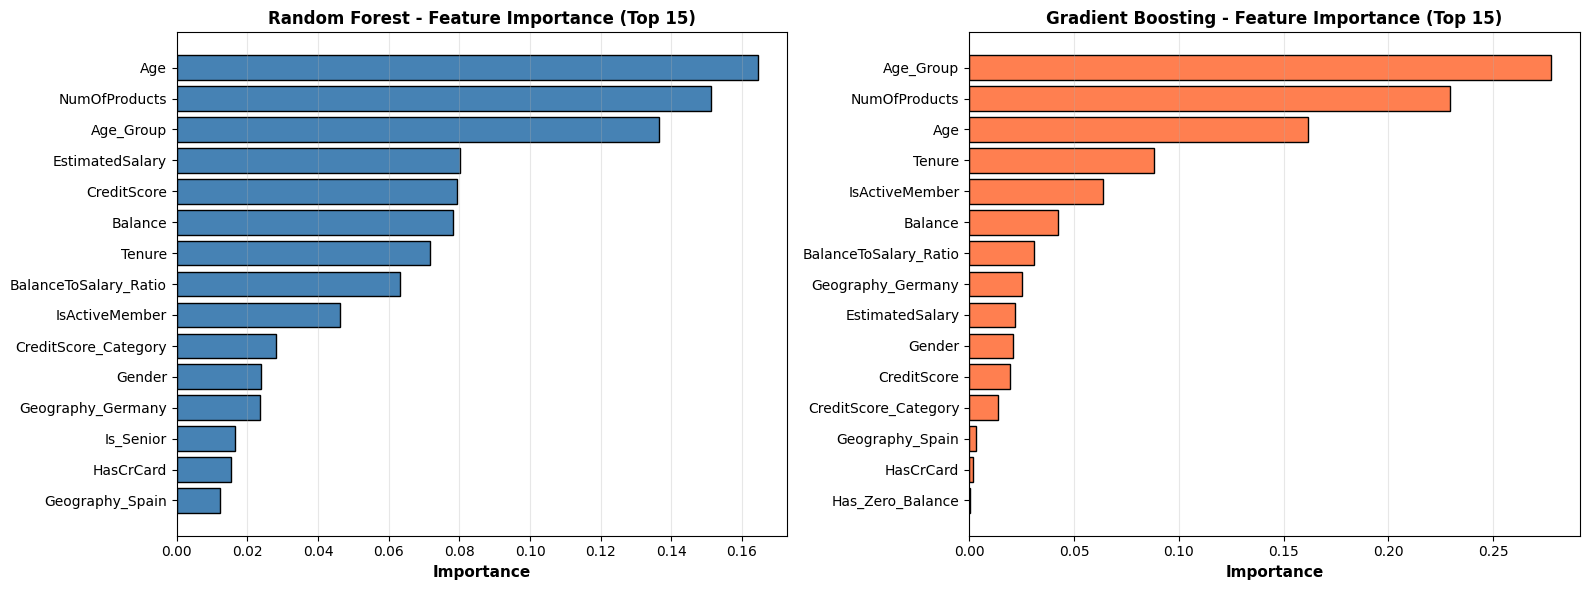

In [71]:
# Visualize Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
top_features_rf = feature_importance_rf.head(15)
axes[0].barh(range(len(top_features_rf)), top_features_rf['Importance'], 
            color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_features_rf)))
axes[0].set_yticklabels(top_features_rf['Feature'])
axes[0].set_xlabel('Importance', fontsize=11, fontweight='bold')
axes[0].set_title('Random Forest - Feature Importance (Top 15)', 
                 fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Gradient Boosting
top_features_gb = feature_importance_gb.head(15)
axes[1].barh(range(len(top_features_gb)), top_features_gb['Importance'], 
            color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_features_gb)))
axes[1].set_yticklabels(top_features_gb['Feature'])
axes[1].set_xlabel('Importance', fontsize=11, fontweight='bold')
axes[1].set_title('Gradient Boosting - Feature Importance (Top 15)', 
                 fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feat_imp.png',dpi=300)
plt.show()

### Logistic Regression Coefficients

In [73]:
lr_model = tuned_models['Logistic Regression']
lr_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Logistic Regression - Feature Coefficients (Top 15)")
print("="*40)
print(lr_coefficients.head(15)[['Feature', 'Coefficient']].to_string(index=False))

Logistic Regression - Feature Coefficients (Top 15)
              Feature  Coefficient
            Age_Group     0.945865
       IsActiveMember    -0.488537
    Geography_Germany     0.306963
               Gender    -0.302268
          CreditScore    -0.233439
 CreditScore_Category     0.189908
              Balance     0.185544
            Is_Senior    -0.126355
        NumOfProducts    -0.113120
BalanceToSalary_Ratio     0.074726
               Tenure    -0.059494
                  Age     0.050430
      EstimatedSalary     0.017700
     Has_Zero_Balance    -0.011188
            HasCrCard    -0.002792


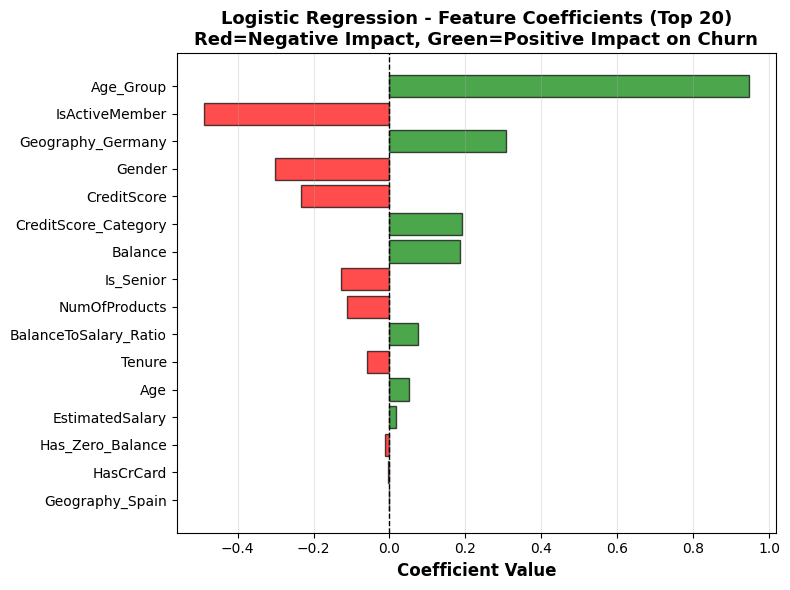

In [74]:
# Visualize coefficients
plt.figure(figsize=(8, 6))
top_coef = lr_coefficients.head(20)
colors = ['red' if x < 0 else 'green' for x in top_coef['Coefficient']]
plt.barh(range(len(top_coef)), top_coef['Coefficient'], color=colors, 
        edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_coef)), top_coef['Feature'])
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.title('Logistic Regression - Feature Coefficients (Top 20)\nRed=Negative Impact, Green=Positive Impact on Churn', 
         fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('log_coef.png',dpi=300)
plt.show()

### SHAP (SHapley Additive exPlanations) Analysis

In [76]:
import shap

# Get model and correct feature names
rf_model = tuned_models['Random Forest']
actual_feature_names = X.columns.tolist()

# Convert X_test_scaled to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=actual_feature_names)

# Create SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values_rf = explainer_rf.shap_values(X_test_scaled_df)

# Handle 3D array (samples, features, classes)
if len(shap_values_rf.shape) == 3:
    # Shape is (n_samples, n_features, n_classes)
    # Extract class 1 (churn) - last dimension
    shap_values_rf_churn = shap_values_rf[:, :, 1]
elif isinstance(shap_values_rf, list):
    # List format for binary classification
    shap_values_rf_churn = shap_values_rf[1]
else:
    # Already 2D
    shap_values_rf_churn = shap_values_rf

# Calculate mean absolute SHAP values for feature importance
mean_abs_shap = np.abs(shap_values_rf_churn).mean(axis=0)

# Create feature importance DataFrame
shap_importance = pd.DataFrame({
    'Feature': actual_feature_names,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values('Mean_Abs_SHAP', ascending=False)

print("\nSHAP explainer initialized")


SHAP explainer initialized


### SHAP Summary Plot

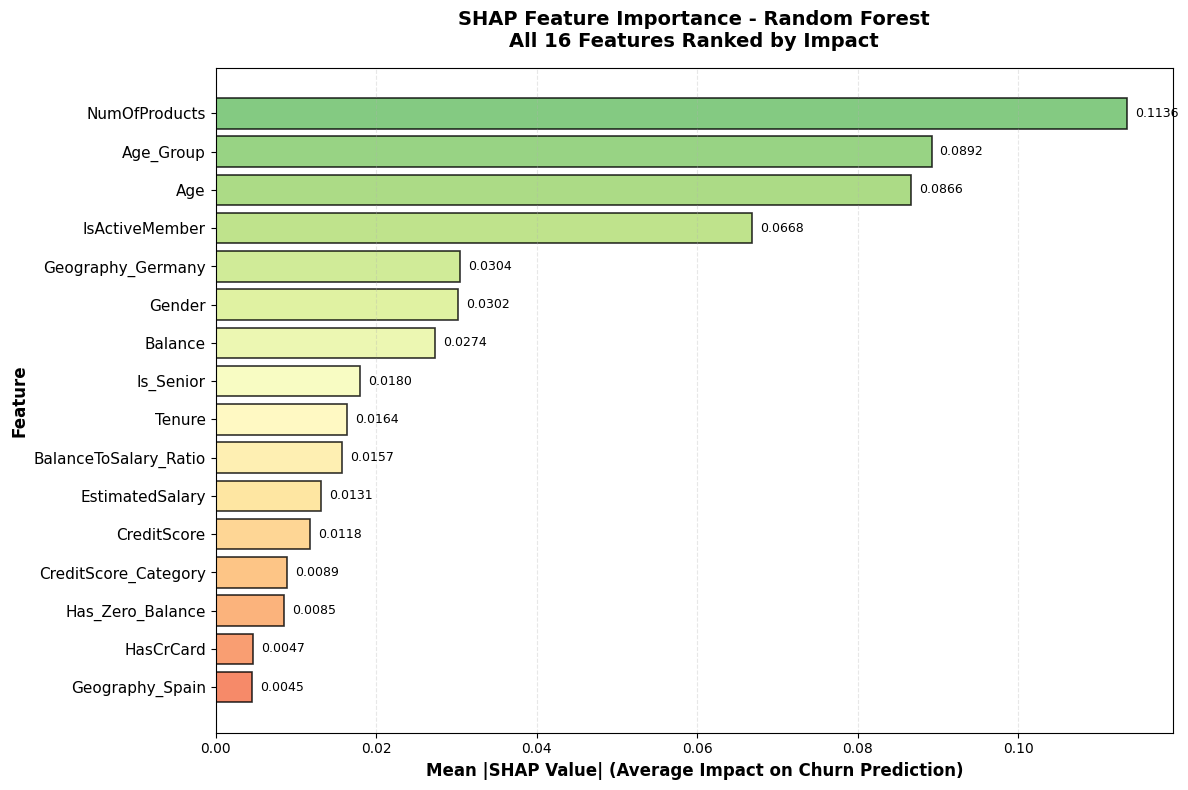

In [78]:
# Manual Bar Plot (Most Reliable)

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(shap_importance)))
plt.barh(range(len(shap_importance)), shap_importance['Mean_Abs_SHAP'], 
        color=colors, edgecolor='black', alpha=0.8, linewidth=1.2)
plt.yticks(range(len(shap_importance)), shap_importance['Feature'], fontsize=11)
plt.xlabel('Mean |SHAP Value| (Average Impact on Churn Prediction)', 
          fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('SHAP Feature Importance - Random Forest\nAll 16 Features Ranked by Impact', 
         fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, v in enumerate(shap_importance['Mean_Abs_SHAP']):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('SHAP_feat.png',dpi=300)
plt.show()

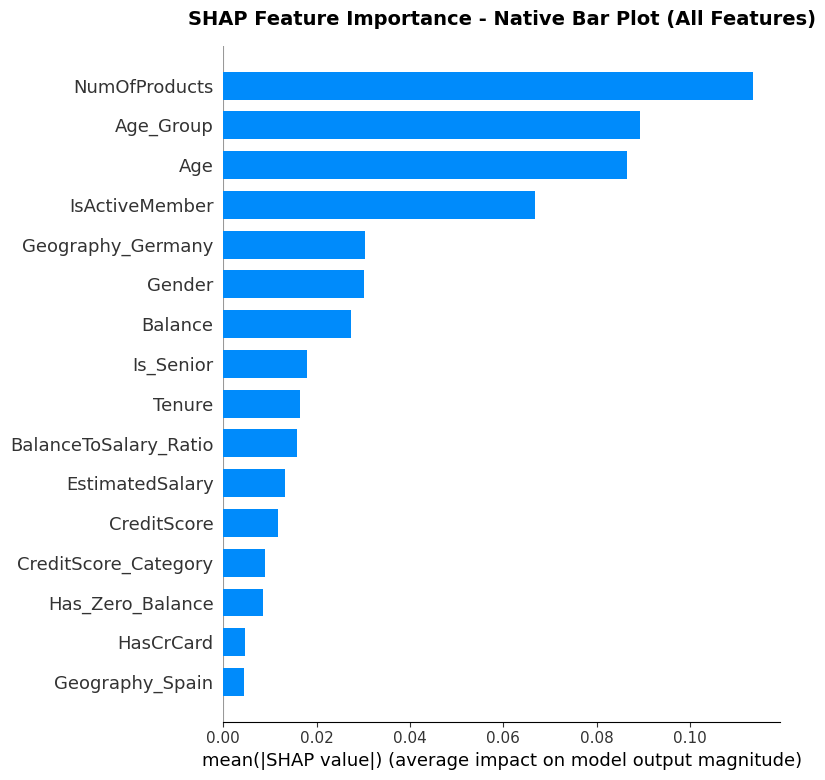

In [79]:
# SHAP Native Bar Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values_rf_churn, 
    X_test_scaled_df,
    plot_type="bar",
    show=False
)
plt.title('SHAP Feature Importance - Native Bar Plot (All Features)', 
         fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

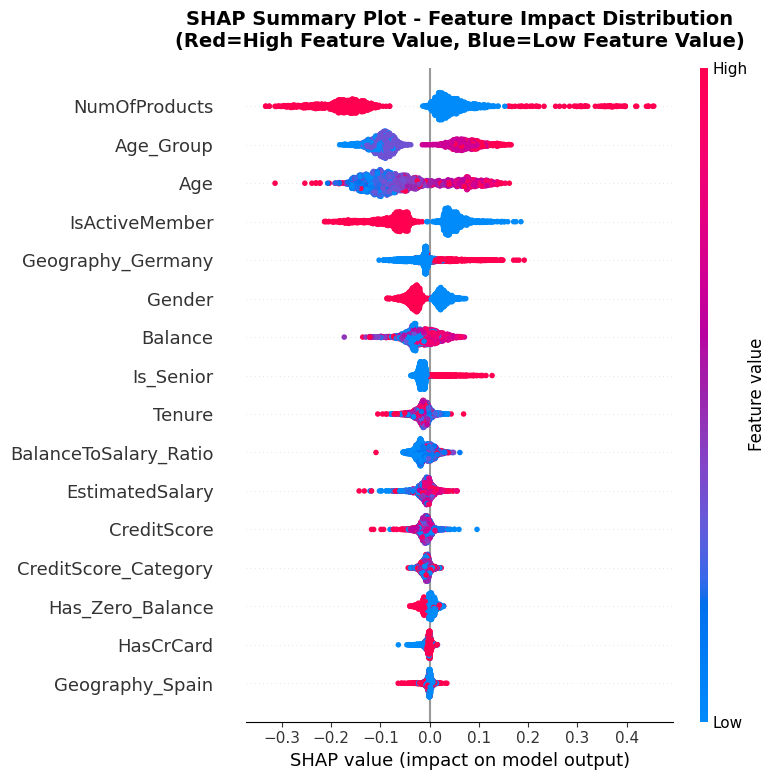

In [80]:
# SHAP Beeswarm Plot (Detailed Impact)
plt.figure(figsize=(12, 10))
shap.summary_plot(
    shap_values_rf_churn, 
    X_test_scaled_df,
    show=False
)
plt.title('SHAP Summary Plot - Feature Impact Distribution\n(Red=High Feature Value, Blue=Low Feature Value)', 
         fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('SHAP_beeswarm.png', dpi=300)
plt.show()

### SHAP Waterfall Plot - Individual Prediction Explanation


Test set contains 407 churned and 1593 not churned customers

Model baseline (expected value): 0.5004

Not Churned Customer (Index: 1)
Actual Status: NOT CHURNED
Predicted Churn Probability: 2.5%
Prediction: NO CHURN (threshold: 50%)
Correct Prediction: YES

Top 5 Feature Values:
  CreditScore: 691.00
  Gender: 0.00
  Age: 29.00
  Tenure: 9.00
  Balance: 0.00


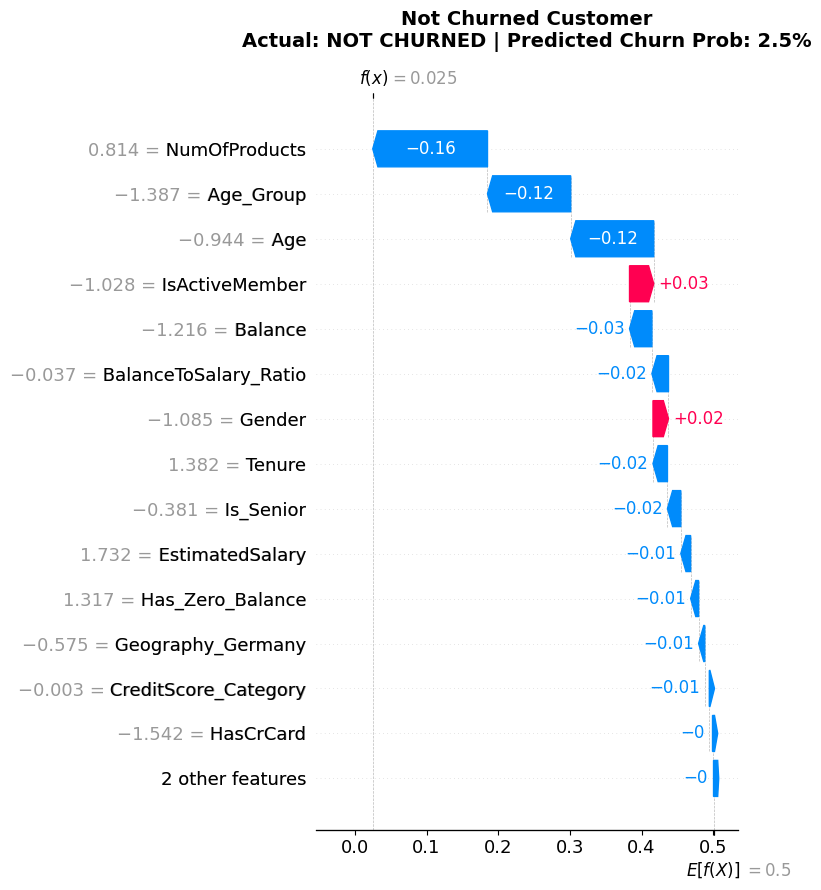


Churned Customer (Index: 0)
Actual Status: CHURNED
Predicted Churn Probability: 89.0%
Prediction: CHURN (threshold: 50%)
Correct Prediction: YES

Top 5 Feature Values:
  CreditScore: 466.00
  Gender: 0.00
  Age: 56.00
  Tenure: 2.00
  Balance: 111920.13


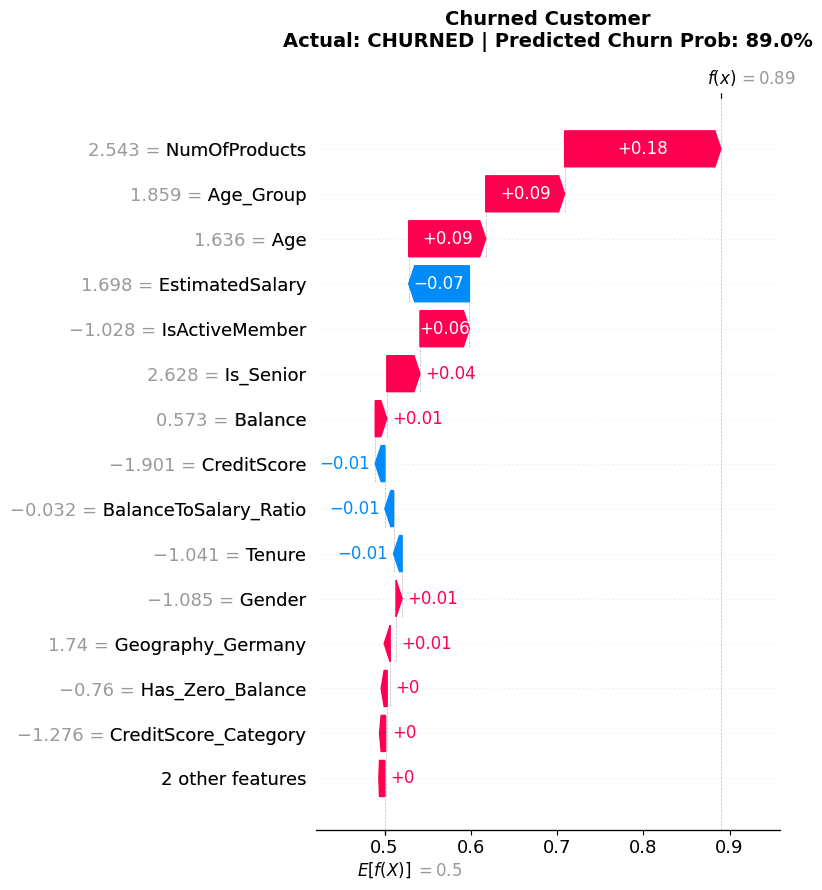

In [82]:
# Find one churned and one non-churned customer from test set
churned_indices = [i for i, val in enumerate(y_test) if val == 1]
not_churned_indices = [i for i, val in enumerate(y_test) if val == 0]

print(f"\nTest set contains {len(churned_indices)} churned and {len(not_churned_indices)} not churned customers")

# Select customers
churned_idx = churned_indices[0]
not_churned_idx = not_churned_indices[0]

# Create comparison
customers = [
    {'index': not_churned_idx, 'label': 'Not Churned Customer', 'actual': 0},
    {'index': churned_idx, 'label': 'Churned Customer', 'actual': 1}
]

# Get base value
if isinstance(explainer_rf.expected_value, (list, np.ndarray)):
    base_value = explainer_rf.expected_value[1] if len(explainer_rf.expected_value) > 1 else explainer_rf.expected_value[0]
else:
    base_value = explainer_rf.expected_value

print(f"\nModel baseline (expected value): {base_value:.4f}")

# Generate waterfall plots separately
for customer in customers:
    sample_idx = customer['index']
    
    # Get prediction
    pred_proba = rf_model.predict_proba(X_test_scaled[sample_idx].reshape(1, -1))[0]
    churn_prob = pred_proba[1]
    
    # Get SHAP values
    sample_shap = shap_values_rf_churn[sample_idx, :]
    
    # Get actual feature values (unscaled for display)
    actual_values = X_test.iloc[sample_idx]
    
    print(f"\n{customer['label']} (Index: {sample_idx})")
    print(f"Actual Status: {'CHURNED' if customer['actual'] == 1 else 'NOT CHURNED'}")
    print(f"Predicted Churn Probability: {churn_prob:.1%}")
    print(f"Prediction: {'CHURN' if churn_prob > 0.5 else 'NO CHURN'} (threshold: 50%)")
    print(f"Correct Prediction: {'YES' if (churn_prob > 0.5) == customer['actual'] else 'NO'}")
    
    # Show top 5 feature values
    print(f"\nTop 5 Feature Values:")
    for feature in actual_feature_names[:5]:
        if feature in actual_values.index:
            print(f"  {feature}: {actual_values[feature]:.2f}")
    
    # Create SHAP explanation object
    shap_exp = shap.Explanation(
        values=sample_shap,
        base_values=base_value,
        data=X_test_scaled_df.iloc[sample_idx].values,
        feature_names=actual_feature_names
    )
    
    # Create individual waterfall plot
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(shap_exp, show=False, max_display=15)
    plt.title(
        f'{customer["label"]}\n' +
        f'Actual: {"CHURNED" if customer["actual"] == 1 else "NOT CHURNED"} | ' +
        f'Predicted Churn Prob: {churn_prob:.1%}',
        fontsize=14, fontweight='bold', pad=15
    )
    plt.tight_layout()
    plt.show()

## LIME (Local Interpretable Model-agnostic Explanations)

In [84]:
import lime
import lime.lime_tabular

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=feature_names,
    class_names=['Not Churned', 'Churned'],
    mode='classification',
    random_state=10
)

print("\nLIME explainer initialized")


LIME explainer initialized


### LIME Explanations for Multiple Models


Explaining prediction for Sample Customer 1
Actual Churn Status: Churned

Original Feature Values:
  CreditScore: 466
  Gender: 0
  Age: 56
  Tenure: 2
  Balance: 111920.13
  NumOfProducts: 3
  HasCrCard: 1
  IsActiveMember: 0
  EstimatedSalary: 197634.11
  Geography_Germany: True
  Geography_Spain: False
  BalanceToSalary_Ratio: 0.5662967981751826
  Age_Group: 3
  Is_Senior: 1
  Has_Zero_Balance: 0
  CreditScore_Category: 0

LIME Explanation for Random Forest

Prediction Probabilities:
  Not Churned: 0.110
  Churned: 0.890


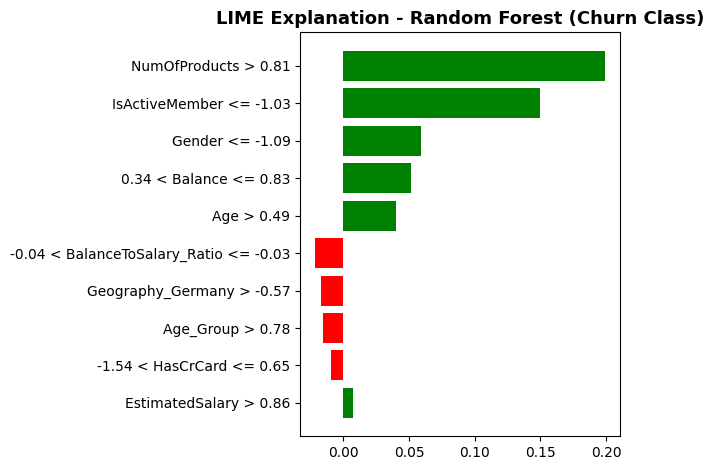


LIME Explanation for Gradient Boosting

Prediction Probabilities:
  Not Churned: 0.003
  Churned: 0.997


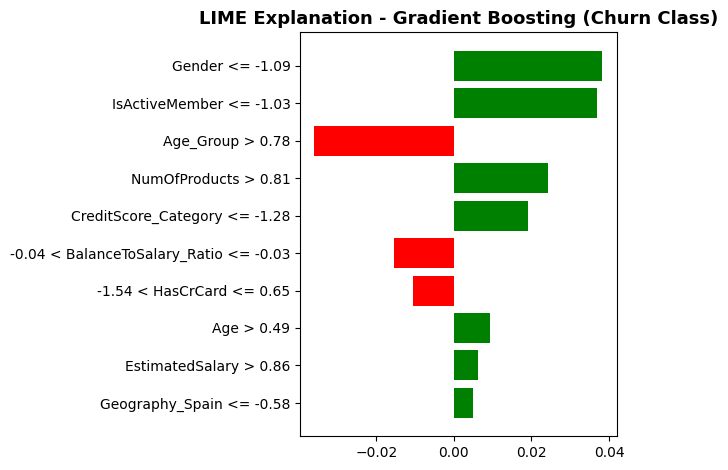


LIME Explanation for Logistic Regression

Prediction Probabilities:
  Not Churned: 0.068
  Churned: 0.932


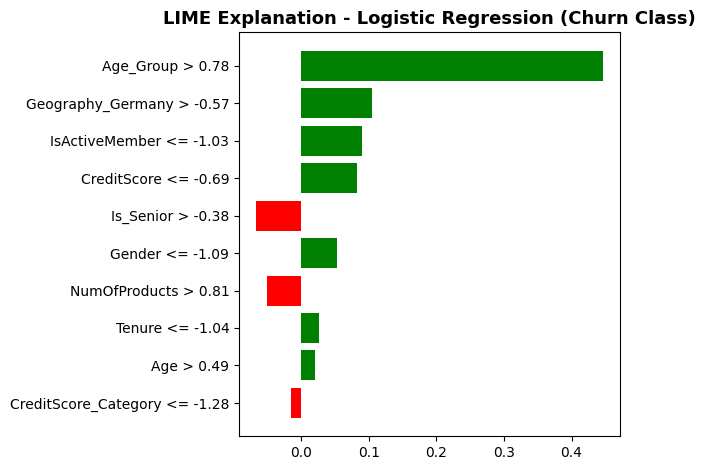

In [172]:
# Select a test instance
sample_idx = 0
sample_instance = X_test_scaled[sample_idx]

print(f"\nExplaining prediction for Sample Customer {sample_idx + 1}")
print(f"Actual Churn Status: {'Churned' if y_test.iloc[sample_idx] == 1 else 'Not Churned'}")
print(f"\nOriginal Feature Values:")
for i, feature in enumerate(feature_names):
    print(f"  {feature}: {X_test.iloc[sample_idx, i]}")

# Explain predictions for each model
models_to_explain = {
    'Random Forest': tuned_models['Random Forest'],
    'Gradient Boosting': tuned_models['Gradient Boosting'],
    'Logistic Regression': tuned_models['Logistic Regression']
}

for model_name, model in models_to_explain.items():
    print(f"\nLIME Explanation for {model_name}")
    print(f"{'='*30}")
    
    # Generate explanation
    lime_exp = lime_explainer.explain_instance(
        data_row=sample_instance,
        predict_fn=model.predict_proba,
        num_features=10,
        top_labels=2
    )
    
    # Get prediction probability
    pred_proba = model.predict_proba(sample_instance.reshape(1, -1))[0]
    print(f"\nPrediction Probabilities:")
    print(f"  Not Churned: {pred_proba[0]:.3f}")
    print(f"  Churned: {pred_proba[1]:.3f}")
    
    # Visualize explanation
    fig = lime_exp.as_pyplot_figure(label=1)
    plt.title(f'LIME Explanation - {model_name} (Churn Class)', 
             fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'LIME_{model_name.replace(" ", "_")}.png', dpi=300)
    plt.show()

### LIME Analysis - Multiple Samples Comparison

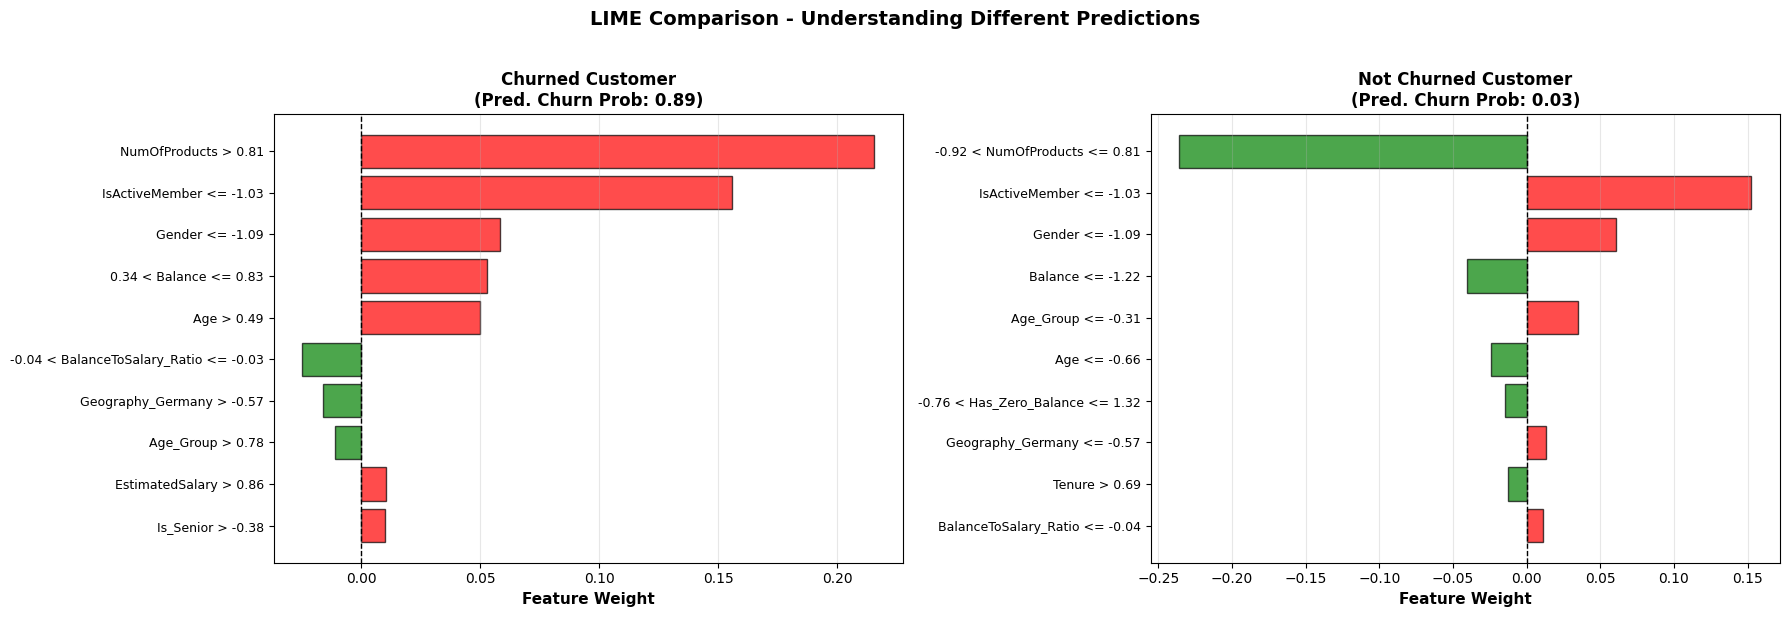

In [88]:
# Find one churned and one not churned customer
churned_idx = y_test[y_test == 1].index[0]
not_churned_idx = y_test[y_test == 0].index[0]

# Get their positions in test set
churned_pos = list(y_test.index).index(churned_idx)
not_churned_pos = list(y_test.index).index(not_churned_idx)

comparison_samples = {
    'Churned Customer': churned_pos,
    'Not Churned Customer': not_churned_pos
}

best_model = tuned_models['Random Forest']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for idx, (label, sample_pos) in enumerate(comparison_samples.items()):
    sample = X_test_scaled[sample_pos]
    
    # Generate LIME explanation
    lime_exp = lime_explainer.explain_instance(
        data_row=sample,
        predict_fn=best_model.predict_proba,
        num_features=10,
        top_labels=2
    )
    
    pred_proba = best_model.predict_proba(sample.reshape(1, -1))[0]
    
    
    # Plot
    exp_dict = dict(lime_exp.as_list(label=1))
    features = list(exp_dict.keys())[:10]
    weights = list(exp_dict.values())[:10]
    
    colors = ['green' if w < 0 else 'red' for w in weights]
    axes[idx].barh(range(len(features)), weights, color=colors, alpha=0.7, edgecolor='black')
    axes[idx].set_yticks(range(len(features)))
    axes[idx].set_yticklabels(features, fontsize=9)
    axes[idx].set_xlabel('Feature Weight', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{label}\n(Pred. Churn Prob: {pred_proba[1]:.2f})', 
                       fontsize=12, fontweight='bold')
    axes[idx].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].invert_yaxis()

plt.suptitle('LIME Comparison - Understanding Different Predictions', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('LIME_comparison.png',dpi=300)
plt.show()

### Model-Agnostic LIME Comparison

In [90]:
sample_idx = 0
sample = X_test_scaled[sample_idx]

print(f"\nAnalyzing how different models explain the same customer:")
print(f"Sample Customer Features:")
for i, feature in enumerate(feature_names[:5]):  # Show first 5 features
    print(f"  {feature}: {X_test.iloc[sample_idx, i]}")

# Compare top features across models
comparison_data = []

for model_name, model in models_to_explain.items():
    lime_exp = lime_explainer.explain_instance(
        data_row=sample,
        predict_fn=model.predict_proba,
        num_features=5,
        top_labels=2
    )
    
    pred_proba = model.predict_proba(sample.reshape(1, -1))[0][1]
    top_features = [feat.split()[0] for feat, _ in lime_exp.as_list(label=1)[:5]]
    
    comparison_data.append({
        'Model': model_name,
        'Churn Probability': pred_proba,
        'Top Feature 1': top_features[0] if len(top_features) > 0 else 'N/A',
        'Top Feature 2': top_features[1] if len(top_features) > 1 else 'N/A',
        'Top Feature 3': top_features[2] if len(top_features) > 2 else 'N/A'
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))


Analyzing how different models explain the same customer:
Sample Customer Features:
  CreditScore: 466
  Gender: 0
  Age: 56
  Tenure: 2
  Balance: 111920.13

               Model  Churn Probability Top Feature 1     Top Feature 2  Top Feature 3
      Random Forest           0.890000 NumOfProducts    IsActiveMember           0.34
  Gradient Boosting           0.996578        Gender    IsActiveMember      Age_Group
Logistic Regression           0.931730     Age_Group Geography_Germany IsActiveMember


### Prediction Example with Explanation

In [92]:
# Select a test sample
sample_idx = 0
sample_data = X_test_scaled[sample_idx].reshape(1, -1)
actual_label = y_test.iloc[sample_idx]

print(f"\nSample Customer Features:")
for i, feature in enumerate(feature_names):
    print(f"  {feature}: {X_test.iloc[sample_idx, i]}")

print(f"\nActual Churn Status: {'Churned' if actual_label == 1 else 'Not Churned'}")

# Predictions from all tuned models
print("\nModel Predictions:")
for name, model in tuned_models.items():
    pred = model.predict(sample_data)[0]
    pred_proba = model.predict_proba(sample_data)[0]
    print(f"\n{name}:")
    print(f"  Prediction: {'Churned' if pred == 1 else 'Not Churned'}")
    print(f"  Probability - Not Churn: {pred_proba[0]:.3f}, Churn: {pred_proba[1]:.3f}")


Sample Customer Features:
  CreditScore: 466
  Gender: 0
  Age: 56
  Tenure: 2
  Balance: 111920.13
  NumOfProducts: 3
  HasCrCard: 1
  IsActiveMember: 0
  EstimatedSalary: 197634.11
  Geography_Germany: True
  Geography_Spain: False
  BalanceToSalary_Ratio: 0.5662967981751826
  Age_Group: 3
  Is_Senior: 1
  Has_Zero_Balance: 0
  CreditScore_Category: 0

Actual Churn Status: Churned

Model Predictions:

Logistic Regression:
  Prediction: Churned
  Probability - Not Churn: 0.068, Churn: 0.932

Decision Tree:
  Prediction: Churned
  Probability - Not Churn: 0.007, Churn: 0.993

Random Forest:
  Prediction: Churned
  Probability - Not Churn: 0.110, Churn: 0.890

Gradient Boosting:
  Prediction: Churned
  Probability - Not Churn: 0.003, Churn: 0.997


## Bias Detection Analysis

In [94]:
# Analyze model performance across demographic groups
best_model = tuned_models['Random Forest']
y_pred_test = best_model.predict(X_test_scaled)

# Performance by Gender
print("\nPerformance by Gender:")
for gender in df.iloc[X_test.index]['Gender'].unique():
    gender_mask = df.iloc[X_test.index]['Gender'] == gender
    if sum(gender_mask) > 0:
        gender_accuracy = accuracy_score(y_test[gender_mask], y_pred_test[gender_mask])
        print(f"  {gender}: Accuracy = {gender_accuracy:.3f} (n={sum(gender_mask)})")

# Performance by Geography
print("\nPerformance by Geography:")
for geo in df.iloc[X_test.index]['Geography'].unique():
    geo_mask = df.iloc[X_test.index]['Geography'] == geo
    if sum(geo_mask) > 0:
        geo_accuracy = accuracy_score(y_test[geo_mask], y_pred_test[geo_mask])
        print(f"  {geo}: Accuracy = {geo_accuracy:.3f} (n={sum(geo_mask)})")

# Performance by Age Group
print("\nPerformance by Age Group:")
age_bins = [0, 30, 40, 50, 100]
age_labels = ['<30', '30-40', '40-50', '>50']
age_groups = pd.cut(df.iloc[X_test.index]['Age'], bins=age_bins, labels=age_labels)

for age_group in age_labels:
    age_mask = age_groups == age_group
    if sum(age_mask) > 0:
        age_accuracy = accuracy_score(y_test[age_mask], y_pred_test[age_mask])
        print(f"  Age {age_group}: Accuracy = {age_accuracy:.3f} (n={sum(age_mask)})")


Performance by Gender:
  Female: Accuracy = 0.832 (n=870)
  Male: Accuracy = 0.862 (n=1130)

Performance by Geography:
  Germany: Accuracy = 0.803 (n=523)
  France: Accuracy = 0.871 (n=1001)
  Spain: Accuracy = 0.853 (n=476)

Performance by Age Group:
  Age <30: Accuracy = 0.938 (n=373)
  Age 30-40: Accuracy = 0.886 (n=886)
  Age 40-50: Accuracy = 0.760 (n=492)
  Age >50: Accuracy = 0.759 (n=249)


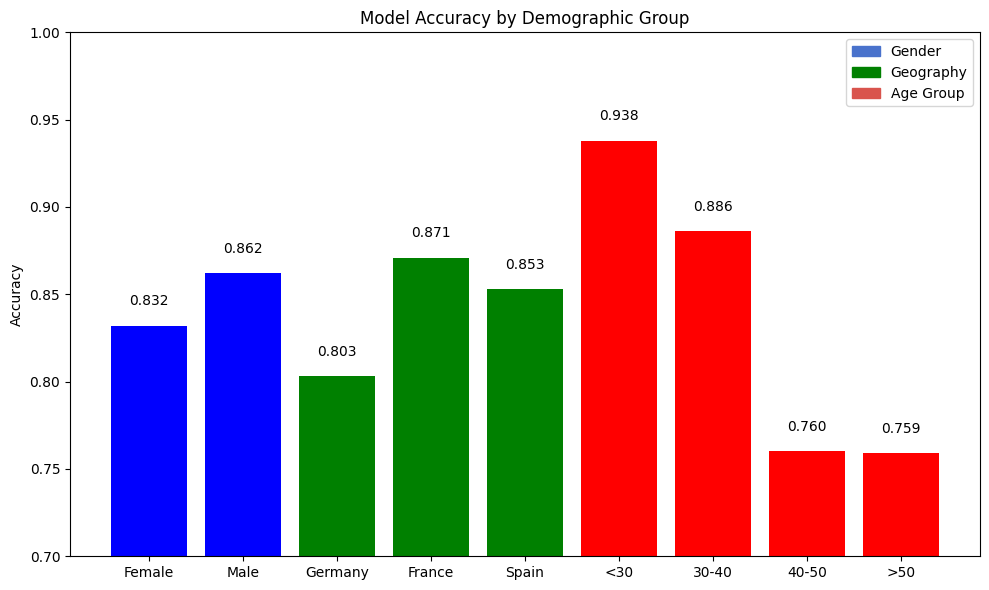

In [170]:
import matplotlib.patches as mpatches

# Data
groups = ['Female', 'Male', 'Germany', 'France', 'Spain', '<30', '30-40', '40-50', '>50']
accuracy = [0.832, 0.862, 0.803, 0.871, 0.853, 0.938, 0.886, 0.760, 0.759]
colors = ['blue', 'blue', 'green', 'green', 'green', 'red', 'red', 'red', 'red']

plt.figure(figsize=(10,6))
bars = plt.bar(groups, accuracy, color=colors)
plt.ylim(0.7, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Demographic Group')

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Create legend
legend_patches = [
    mpatches.Patch(color='#4972CC', label='Gender'),
    mpatches.Patch(color='green', label='Geography'),
    mpatches.Patch(color='#D9544D', label='Age Group')
]
plt.legend(handles=legend_patches, loc='upper right')

plt.tight_layout()
plt.show()